In [1]:
import sys
import numpy as np
from pyDOE import lhs
import torch
from torch import Tensor, ones, stack, load
from torch.autograd import grad
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
import pandas as pd
from torch.nn import Module
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from scipy import stats
from tesladatadiff3 import TeslaDatasetAll, TeslaDatasetSlice, TeslaDatasetpinn

sys.path.append("NeuralSolvers/")  
import PINNFramework as pf

Was not able to import Horovod. Thus Horovod support is not enabled


/trinity/shared/pkg/devel/python/3.6.5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Use cuda if it is available, else use the cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
def derivative(x, u):

    #u = u[:, 0]
    grads = ones(u.shape, device=u.device) # move to the same device as prediction
    grad_u = grad(u, x, create_graph=True, grad_outputs=grads )[0]
   
    # calculate first order derivatives
    print('grad u', grad_u.shape)
    print('grad u', grad_u)
    u_t = grad_u #[:, 5]

    return u_t

In [4]:
normalize = 1
batch_size = 1

In [5]:
# Create instance of the dataset
#ds = TeslaDatasetAll(device = device, normalize = normalize,rel_time = True)
id=30
ds = TeslaDatasetpinn(device = device, normalize = normalize, rel_time = False, ID = id)


(2301, 10)


In [6]:
train_loader = DataLoader(ds, batch_size=batch_size, shuffle=False)
#next(iter(train_loader))

In [7]:
model = pf.models.MLP(input_size=5,
                      output_size=1, 
                      hidden_size=100, 
                      num_hidden=4, 
                      lb=ds.lb, 
                      ub=ds.ub,
                      activation = torch.relu
                      )
model.to(device)


In [8]:
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)
criterion = torch.nn.MSELoss()

Starting epoch 0
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[ 6.1276e-04,  1.8570e-03,  1.6893e-02,  1.1462e-03, -5.6730e-05],
         [ 5.0113e-04,  1.7736e-03,  1.3225e-02,  1.1400e-03, -5.8258e-05],
         [ 4.9501e-04,  1.7783e-03,  1.3152e-02,  1.1392e-03, -5.8479e-05],
         ...,
         [ 7.5961e-04,  9.4350e-04,  1.4236e-02, -9.0317e-04,  7.1767e-05],
         [ 5.6183e-04,  8.0755e-04,  1.1972e-02, -7.3769e-04,  4.5283e-05],
         [ 5.6183e-04,  8.0755e-04,  1.1972e-02, -7.3769e-04,  4.5283e-05]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  0 Total Loss  10.850983619689941
Epoch  0 Loss 1  0.005609442014247179
Epoch  0 Loss 2 10.84537410736084
Starting epoch 1
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1,

grad u torch.Size([1, 2299, 5])
grad u tensor([[[ 0.0224,  0.0248, -0.5484,  0.0700,  0.0024],
         [ 0.0292,  0.0222, -0.5339,  0.0708,  0.0022],
         [ 0.0249,  0.0251, -0.5127,  0.0699,  0.0024],
         ...,
         [ 0.0344,  0.0375,  0.7466,  0.0460, -0.0018],
         [ 0.0351,  0.0381,  0.7085,  0.0454, -0.0018],
         [ 0.0351,  0.0381,  0.7085,  0.0454, -0.0018]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  19 Total Loss  1.393812894821167
Epoch  19 Loss 1  0.04233855754137039
Epoch  19 Loss 2 1.3514742851257324
Starting epoch 20
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[ 0.0217,  0.0231, -0.5230,  0.0674,  0.0023],
         [ 0.0217,  0.0231, -0.5230,  0.0674,  0.0023],
         [ 0.0217,  0.0231, -0.5230,  0.0674,  0.0023],
         ...

Epoch  39 Total Loss  0.20511943101882935
Epoch  39 Loss 1  0.02070782519876957
Epoch  39 Loss 2 0.18441160023212433
Starting epoch 40
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[ 0.0211,  0.0223, -0.3536,  0.0574,  0.0018],
         [ 0.0223,  0.0217, -0.3700,  0.0561,  0.0017],
         [ 0.0223,  0.0217, -0.3700,  0.0561,  0.0017],
         ...,
         [ 0.0360,  0.0226,  0.2932,  0.0496, -0.0011],
         [ 0.0355,  0.0231,  0.2785,  0.0509, -0.0011],
         [ 0.0346,  0.0232,  0.3014,  0.0499, -0.0011]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  40 Total Loss  0.2341311275959015
Epoch  40 Loss 1  0.020749453455209732
Epoch  40 Loss 2 0.21338167786598206
Starting epoch 41
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[ 0.0144,  0.0254, -0.2658,  0.0607,  0.0014],
         [ 0.0177,  0.0228, -0.2847,  0.0615,  0.0013],
         [ 0.0143,  0.0254, -0.2649,  0.0608,  0.0015],
         ...,
         [ 0.0289,  0.0199,  0.1538,  0.0603, -0.0010],
         [ 0.0276,  0.0208,  0.1488,  0.0584, -0.0011],
         [ 0.0276,  0.0208,  0.1488,  0.0584, -0.0011]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  60 Total Loss  0.09276123344898224
Epoch  60 Loss 1  0.014539303258061409
Epoch  60 Loss 2 0.07822193205356598
Starting epoch 61
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[ 0.0144,  0.0256, -0.2690,  0.0614,  0.0015],
         [ 0.0178,  0.0229, -0.2881,  0.0622,  0.0013],
         [ 0.0177,  0.0229, -0.2

Epoch  80 Total Loss  0.052424754947423935
Epoch  80 Loss 1  0.010116233490407467
Epoch  80 Loss 2 0.04230852052569389
Starting epoch 81
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[ 0.0148,  0.0228, -0.2627,  0.0666,  0.0011],
         [ 0.0154,  0.0234, -0.2529,  0.0666,  0.0011],
         [ 0.0154,  0.0234, -0.2529,  0.0666,  0.0011],
         ...,
         [ 0.0235,  0.0168,  0.0526,  0.0714, -0.0009],
         [ 0.0240,  0.0174,  0.0617,  0.0702, -0.0008],
         [ 0.0240,  0.0174,  0.0617,  0.0702, -0.0008]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  81 Total Loss  0.05013443902134895
Epoch  81 Loss 1  0.009815745055675507
Epoch  81 Loss 2 0.04031869396567345
Starting epoch 82
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.S

grad u tensor([[[ 1.4269e-02,  2.2104e-02, -2.2571e-01,  7.0040e-02,  8.2415e-04],
         [ 1.4269e-02,  2.2104e-02, -2.2571e-01,  7.0040e-02,  8.2415e-04],
         [ 1.4014e-02,  2.1897e-02, -2.1925e-01,  7.0125e-02,  8.8058e-04],
         ...,
         [ 1.9519e-02,  9.1467e-03,  9.1678e-03,  8.7004e-02, -4.2282e-04],
         [ 1.1805e-02,  1.9297e-02,  7.7609e-02,  8.9772e-02,  7.2993e-05],
         [ 1.1805e-02,  1.9297e-02,  7.7609e-02,  8.9772e-02,  7.2993e-05]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  101 Total Loss  0.023081688210368156
Epoch  101 Loss 1  0.005870477762073278
Epoch  101 Loss 2 0.01721120998263359
Starting epoch 102
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[ 1.4252e-02,  2.2043e-02, -2.2428e-01,  7.0273e-02,  8.1317e-04],
       

uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  121 Total Loss  0.010693347081542015
Epoch  121 Loss 1  0.0042484537698328495
Epoch  121 Loss 2 0.006444892846047878
Starting epoch 122
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[ 1.0123e-02,  1.8603e-02, -1.8321e-01,  8.6649e-02,  1.6194e-04],
         [ 9.3750e-03,  1.7679e-02, -1.6788e-01,  8.7363e-02,  3.0564e-04],
         [ 9.6586e-03,  1.9182e-02, -1.9300e-01,  8.4054e-02,  3.0077e-04],
         ...,
         [ 9.1197e-03,  8.4785e-03,  3.9470e-02,  1.1346e-01,  5.0919e-04],
         [ 9.2807e-03,  1.3268e-02,  4.1730e-02,  1.0523e-01,  4.8556e-04],
         [ 9.2807e-03,  1.3268e-02,  4.1730e-02,  1.0523e-01,  4.8556e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Siz

Epoch  141 Total Loss  0.0070952158421278
Epoch  141 Loss 1  0.003517748787999153
Epoch  141 Loss 2 0.003577466821298003
Starting epoch 142
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[ 0.0071,  0.0138, -0.1725,  0.0918,  0.0003],
         [ 0.0072,  0.0137, -0.1743,  0.0916,  0.0003],
         [ 0.0073,  0.0137, -0.1766,  0.0914,  0.0003],
         ...,
         [ 0.0110,  0.0064,  0.0317,  0.1151,  0.0006],
         [ 0.0104,  0.0122,  0.0446,  0.1055,  0.0006],
         [ 0.0104,  0.0122,  0.0446,  0.1055,  0.0006]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  142 Total Loss  0.006967845372855663
Epoch  142 Loss 1  0.0034708131570369005
Epoch  142 Loss 2 0.0034970322158187628
Starting epoch 143
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
t

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[ 0.0026,  0.0101, -0.2093,  0.0991,  0.0002],
         [ 0.0030,  0.0105, -0.1978,  0.0990,  0.0002],
         [ 0.0033,  0.0101, -0.2026,  0.0983,  0.0002],
         ...,
         [ 0.0073,  0.0055,  0.1008,  0.1200,  0.0008],
         [ 0.0109,  0.0150,  0.0557,  0.1011,  0.0007],
         [ 0.0109,  0.0150,  0.0557,  0.1011,  0.0007]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  162 Total Loss  0.005532330833375454
Epoch  162 Loss 1  0.00307901157066226
Epoch  162 Loss 2 0.0024533190298825502
Starting epoch 163
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[ 0.0026,  0.0101, -0.2097,  0.0992,  0.0002],
         [ 0.0029,  0.0105, -0.1982,  0.0991,  0.0002],
         [ 0.0033,  0.0101

grad u tensor([[[-1.8090e-04,  9.0582e-03, -1.9132e-01,  1.0130e-01,  3.7361e-04],
         [ 1.5815e-03,  9.6288e-03, -2.1510e-01,  1.0036e-01,  2.1248e-04],
         [ 1.6630e-03,  9.6609e-03, -2.1715e-01,  1.0012e-01,  2.1327e-04],
         ...,
         [ 7.8223e-03,  5.3777e-03,  8.0567e-02,  1.2009e-01,  7.6496e-04],
         [ 1.1737e-02,  1.5216e-02,  7.4689e-02,  9.9853e-02,  7.5302e-04],
         [ 1.1737e-02,  1.5216e-02,  7.4689e-02,  9.9853e-02,  7.5302e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  182 Total Loss  0.004751141183078289
Epoch  182 Loss 1  0.0028773259837180376
Epoch  182 Loss 2 0.0018738150829449296
Starting epoch 183
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-2.1834e-04,  9.0302e-03, -1.9148e-01,  1.0135e-01,  3.7333e-04],
    

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0005,  0.0078, -0.1615,  0.1021,  0.0005],
         [ 0.0014,  0.0084, -0.1875,  0.1009,  0.0003],
         [ 0.0014,  0.0084, -0.1875,  0.1009,  0.0003],
         ...,
         [ 0.0088,  0.0079,  0.0902,  0.1128,  0.0008],
         [ 0.0118,  0.0127,  0.0985,  0.1027,  0.0008],
         [ 0.0118,  0.0127,  0.0985,  0.1027,  0.0008]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  203 Total Loss  0.004255969543009996
Epoch  203 Loss 1  0.0027015279047191143
Epoch  203 Loss 2 0.0015544416382908821
Starting epoch 204
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0009,  0.0061, -0.1825,  0.

grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0038,  0.0045, -0.2016,  0.1061,  0.0005],
         [ 0.0010,  0.0079, -0.1873,  0.1014,  0.0003],
         [ 0.0010,  0.0079, -0.1873,  0.1014,  0.0003],
         ...,
         [ 0.0110,  0.0103,  0.0999,  0.1051,  0.0007],
         [ 0.0123,  0.0123,  0.0891,  0.1022,  0.0008],
         [ 0.0123,  0.0105,  0.0926,  0.1042,  0.0008]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  223 Total Loss  0.003947045654058456
Epoch  223 Loss 1  0.002584694651886821
Epoch  223 Loss 2 0.0013623512350022793
Starting epoch 224
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0038,  0.0045, -0.2015,  0.1061,  0.0005],
         [ 0.0009,  0.0079, -0.1872,  0.1014,  0.0003],
         [ 0.0009,  0.0079, -0.1872,  0.1014,  0.0003],
 

Epoch  243 Total Loss  0.0036980232689529657
Epoch  243 Loss 1  0.0024789494927972555
Epoch  243 Loss 2 0.0012190737761557102
Starting epoch 244
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-2.7352e-03,  5.6185e-04, -1.7150e-01,  1.1574e-01,  3.5928e-04],
         [ 1.7033e-03,  6.1094e-03, -1.9440e-01,  1.0714e-01,  9.5233e-05],
         [ 1.7033e-03,  6.1094e-03, -1.9440e-01,  1.0714e-01,  9.5233e-05],
         ...,
         [ 9.6379e-03,  8.8504e-03,  7.5604e-02,  1.0914e-01,  7.3964e-04],
         [ 1.2690e-02,  1.0204e-02,  8.5295e-02,  1.0365e-01,  7.4715e-04],
         [ 1.2690e-02,  1.0204e-02,  8.5295e-02,  1.0365e-01,  7.4715e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  244 Total Loss  0.003686323296278715
Epoch  244 Loss 1  0.0024735063780099154
E

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-3.7985e-03,  1.4481e-03, -1.1444e-01,  1.1481e-01,  5.7334e-04],
         [ 1.4076e-03,  3.5698e-03, -2.1480e-01,  1.0923e-01,  8.4952e-05],
         [ 2.1059e-03,  7.0938e-03, -1.4995e-01,  1.0541e-01,  2.2436e-04],
         ...,
         [ 8.2721e-03,  7.4008e-03,  1.0501e-01,  1.1213e-01,  8.3778e-04],
         [ 1.4507e-02,  1.0321e-02,  5.8251e-02,  1.0228e-01,  7.3441e-04],
         [ 1.4507e-02,  1.0321e-02,  5.8251e-02,  1.0228e-01,  7.3441e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  264 Total Loss  0.0034630815498530865
Epoch  264 Loss 1  0.0023619518615305424
Epoch  264 Loss 2 0.001101129804737866
Starting epoch 265
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-3.825

Epoch  284 Total Loss  0.003285094629973173
Epoch  284 Loss 1  0.0022806967608630657
Epoch  284 Loss 2 0.0010043977526947856
Starting epoch 285
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-3.8720e-03,  1.2698e-03, -1.0114e-01,  1.1643e-01,  4.9080e-04],
         [ 1.3421e-03,  1.4823e-03, -1.5865e-01,  1.1444e-01,  1.2608e-04],
         [ 1.5915e-03,  6.8641e-03, -1.4631e-01,  1.0524e-01,  2.5842e-04],
         ...,
         [ 9.3872e-03,  6.5632e-03,  1.0423e-01,  1.1085e-01,  8.1901e-04],
         [ 1.5903e-02,  9.5278e-03,  8.7903e-02,  9.9767e-02,  7.5469e-04],
         [ 1.5903e-02,  9.5278e-03,  8.7903e-02,  9.9767e-02,  7.5469e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  285 Total Loss  0.0032730353996157646
Epoch  285 Loss 1  0.0022733197547495365
E

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0045,  0.0011, -0.0968,  0.1163,  0.0005],
         [ 0.0010,  0.0027, -0.1104,  0.1131,  0.0003],
         [ 0.0006,  0.0047, -0.1669,  0.1075,  0.0003],
         ...,
         [ 0.0089,  0.0083,  0.0951,  0.1129,  0.0010],
         [ 0.0159,  0.0094,  0.1064,  0.0971,  0.0007],
         [ 0.0159,  0.0094,  0.1064,  0.0971,  0.0007]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  305 Total Loss  0.003122975816950202
Epoch  305 Loss 1  0.0022130387369543314
Epoch  305 Loss 2 0.0009099370217882097
Starting epoch 306
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0045,  0.0011, -0.0965,  0.1163,  0.0005],
         [ 0.0010,  0.0027, -0.1102,  0.1131,  0.0003],
         [ 0.0005,  0.00

grad u tensor([[[-0.0058, -0.0013, -0.0573,  0.1219,  0.0006],
         [ 0.0017,  0.0013, -0.1227,  0.1144,  0.0002],
         [ 0.0001,  0.0025, -0.1169,  0.1111,  0.0004],
         ...,
         [ 0.0075,  0.0041,  0.0561,  0.1233,  0.0010],
         [ 0.0157,  0.0104,  0.0992,  0.0983,  0.0008],
         [ 0.0157,  0.0104,  0.0992,  0.0983,  0.0008]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  325 Total Loss  0.0029502944089472294
Epoch  325 Loss 1  0.0021192284766584635
Epoch  325 Loss 2 0.0008310658158734441
Starting epoch 326
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-5.8661e-03, -1.3161e-03, -5.7011e-02,  1.2192e-01,  5.6805e-04],
         [ 1.6246e-03,  1.2555e-03, -1.2252e-01,  1.1441e-01,  1.9624e-04],
         [ 1.0646e-04,  2.5103e-03, -1.1667e-01

Epoch  345 Total Loss  0.002831749152392149
Epoch  345 Loss 1  0.0020686539355665445
Epoch  345 Loss 2 0.0007630952168256044
Starting epoch 346
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0066, -0.0013, -0.0466,  0.1221,  0.0006],
         [ 0.0011,  0.0013, -0.1162,  0.1142,  0.0002],
         [ 0.0008,  0.0013, -0.1275,  0.1125,  0.0003],
         ...,
         [ 0.0137,  0.0086,  0.0772,  0.1038,  0.0008],
         [ 0.0159,  0.0100,  0.0925,  0.0977,  0.0008],
         [ 0.0159,  0.0100,  0.0925,  0.0977,  0.0008]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  346 Total Loss  0.0028228419832885265
Epoch  346 Loss 1  0.0020626408513635397
Epoch  346 Loss 2 0.000760201015509665
Starting epoch 347
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-7.0303e-03, -1.5317e-03, -4.0506e-02,  1.2198e-01,  6.5609e-04],
         [ 3.1755e-04, -2.2403e-03, -1.2827e-01,  1.2083e-01,  9.3699e-05],
         [ 3.6778e-04,  1.1104e-03, -1.2178e-01,  1.1238e-01,  3.7650e-04],
         ...,
         [ 1.2935e-02,  9.2474e-03,  1.5905e-01,  9.6317e-02,  8.5400e-04],
         [ 1.4867e-02,  1.0105e-02,  1.6931e-01,  9.1952e-02,  7.8323e-04],
         [ 1.4867e-02,  1.0105e-02,  1.6931e-01,  9.1952e-02,  7.8323e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  366 Total Loss  0.002756962552666664
Epoch  366 Loss 1  0.0020458747167140245
Epoch  366 Loss 2 0.0007110879523679614
Starting epoch 367
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-4.1378e-03, -1.7322e-03, -7.2318e-02,  1.2112e-01,  4.5050e-04],
         [-1.0110e-04, -2.4602e-03, -1.2086e-01,  1.2086e-01,  1.3615e-04],
         [-3.0991e-04, -4.5374e-04, -1.5832e-01,  1.1358e-01,  3.1203e-04],
         ...,
         [ 1.1452e-02,  9.2254e-03,  1.9154e-01,  9.5900e-02,  8.5393e-04],
         [ 1.5013e-02,  1.1183e-02,  1.7680e-01,  8.8187e-02,  7.3791e-04],
         [ 1.5350e-02,  1.2040e-02,  1.7098e-01,  8.7933e-02,  7.9248e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  386 Total Loss  0.002692380454391241
Epoch  386 Loss 1  0.0020216023549437523
Epoch  386 Loss 2 0.000670777983032167
Starting epoch 387
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-4.1548

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0045, -0.0020, -0.0636,  0.1212,  0.0005],
         [-0.0005, -0.0027, -0.1122,  0.1209,  0.0002],
         [-0.0007, -0.0007, -0.1503,  0.1136,  0.0004],
         ...,
         [ 0.0080,  0.0076,  0.1762,  0.1018,  0.0009],
         [ 0.0158,  0.0116,  0.1644,  0.0869,  0.0008],
         [ 0.0158,  0.0116,  0.1644,  0.0869,  0.0008]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  406 Total Loss  0.002668821718543768
Epoch  406 Loss 1  0.002027595415711403
Epoch  406 Loss 2 0.0006412261864170432
Starting epoch 407
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0045, -0.0020, -0.0632,  0.1

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0038, -0.0035, -0.0711,  0.1226,  0.0004],
         [-0.0009, -0.0029, -0.1048,  0.1209,  0.0002],
         [-0.0011, -0.0009, -0.1434,  0.1136,  0.0004],
         ...,
         [ 0.0116,  0.0086,  0.1842,  0.0950,  0.0008],
         [ 0.0160,  0.0113,  0.1599,  0.0863,  0.0007],
         [ 0.0160,  0.0113,  0.1599,  0.0863,  0.0007]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  426 Total Loss  0.0026132254861295223
Epoch  426 Loss 1  0.0019963637460023165
Epoch  426 Loss 2 0.0006168618565425277
Starting epoch 427
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0039, -0.0035, -0.0708,  0

Epoch  446 Total Loss  0.002554197795689106
Epoch  446 Loss 1  0.0019585653208196163
Epoch  446 Loss 2 0.0005956325330771506
Starting epoch 447
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0051, -0.0025, -0.0482,  0.1211,  0.0006],
         [-0.0013, -0.0031, -0.0973,  0.1208,  0.0003],
         [-0.0015, -0.0011, -0.1364,  0.1135,  0.0004],
         ...,
         [ 0.0084,  0.0069,  0.1522,  0.1021,  0.0008],
         [ 0.0167,  0.0114,  0.1548,  0.0871,  0.0008],
         [ 0.0161,  0.0110,  0.1560,  0.0857,  0.0007]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  447 Total Loss  0.002550082979723811
Epoch  447 Loss 1  0.0019554763566702604
Epoch  447 Loss 2 0.0005946066230535507
Starting epoch 448
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1

grad u tensor([[[-0.0045, -0.0039, -0.0571,  0.1224,  0.0005],
         [-0.0016, -0.0033, -0.0917,  0.1207,  0.0003],
         [-0.0018, -0.0012, -0.1313,  0.1134,  0.0005],
         ...,
         [ 0.0085,  0.0067,  0.1473,  0.1013,  0.0008],
         [ 0.0106,  0.0108,  0.1862,  0.0937,  0.0008],
         [ 0.0106,  0.0108,  0.1862,  0.0937,  0.0008]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  467 Total Loss  0.0024932646192610264
Epoch  467 Loss 1  0.0019317385740578175
Epoch  467 Loss 2 0.0005615260452032089
Starting epoch 468
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0045, -0.0039, -0.0569,  0.1224,  0.0005],
         [-0.0016, -0.0033, -0.0915,  0.1207,  0.0003],
         [-0.0018, -0.0013, -0.1311,  0.1133,  0.0005],
         ...,
         [ 0.0085

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0078, -0.0052, -0.0663,  0.1239,  0.0006],
         [-0.0020, -0.0035, -0.0821,  0.1207,  0.0003],
         [-0.0018, -0.0014, -0.1132,  0.1149,  0.0004],
         ...,
         [ 0.0077,  0.0074,  0.1265,  0.1069,  0.0010],
         [ 0.0132,  0.0103,  0.0943,  0.0965,  0.0009],
         [ 0.0131,  0.0105,  0.1097,  0.0950,  0.0009]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  488 Total Loss  0.002463842974975705
Epoch  488 Loss 1  0.001906799036078155
Epoch  488 Loss 2 0.000557043997105211
Starting epoch 489
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0078, -0.0052, -0.0659,  0.12

y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  508 Total Loss  0.002413899637758732
Epoch  508 Loss 1  0.001863389741629362
Epoch  508 Loss 2 0.0005505097797140479
Starting epoch 509
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0050, -0.0043, -0.0428,  0.1221,  0.0006],
         [-0.0026, -0.0036, -0.0758,  0.1209,  0.0004],
         [-0.0023, -0.0013, -0.1318,  0.1159,  0.0002],
         ...,
         [ 0.0075,  0.0072,  0.1243,  0.1065,  0.0009],
         [ 0.0153,  0.0114,  0.1300,  0.0891,  0.0008],
         [ 0.0153,  0.0114,  0.1300,  0.0891,  0.0008]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  509 Total Loss  0.002408720552921295
Epoch  509 Loss 1  0.001858848612755537
Epoch  509 Loss 2 0.0005498718819580972
Starting epoch 51

uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  528 Total Loss  0.0023556735832244158
Epoch  528 Loss 1  0.0018182748463004827
Epoch  528 Loss 2 0.0005373986787162721
Starting epoch 529
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0082, -0.0056, -0.0524,  0.1237,  0.0007],
         [-0.0027, -0.0037, -0.0717,  0.1205,  0.0004],
         [-0.0030, -0.0013, -0.1381,  0.1142,  0.0003],
         ...,
         [ 0.0074,  0.0071,  0.1229,  0.1062,  0.0009],
         [ 0.0155,  0.0111,  0.1131,  0.0902,  0.0008],
         [ 0.0154,  0.0113,  0.1281,  0.0887,  0.0007]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  529 Total Loss  0.0023504437413066626
Epoch  529 Loss 1  0.0018135979771614075
Epoch  529 Loss 2 0.00

y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  548 Total Loss  0.0023111747577786446
Epoch  548 Loss 1  0.0017845253460109234
Epoch  548 Loss 2 0.000526649528183043
Starting epoch 549
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0087, -0.0051, -0.0846,  0.1234,  0.0006],
         [-0.0022, -0.0031, -0.0761,  0.1181,  0.0004],
         [-0.0023, -0.0009, -0.1265,  0.1139,  0.0003],
         ...,
         [ 0.0073,  0.0069,  0.1552,  0.1050,  0.0010],
         [ 0.0130,  0.0100,  0.1022,  0.0937,  0.0008],
         [ 0.0153,  0.0111,  0.1260,  0.0883,  0.0007]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  549 Total Loss  0.00231307209469378
Epoch  549 Loss 1  0.001787129556760192
Epoch  549 Loss 2 0.0005259424797259271
Starting epoch 55

grad u tensor([[[-0.0050, -0.0033, -0.0793,  0.1193,  0.0005],
         [-0.0024, -0.0033, -0.0708,  0.1180,  0.0004],
         [-0.0032, -0.0003, -0.1760,  0.1120,  0.0002],
         ...,
         [ 0.0147,  0.0074,  0.1083,  0.0955,  0.0009],
         [ 0.0104,  0.0092,  0.1816,  0.0962,  0.0010],
         [ 0.0127,  0.0103,  0.2055,  0.0907,  0.0009]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  568 Total Loss  0.002274807309731841
Epoch  568 Loss 1  0.0017659481381997466
Epoch  568 Loss 2 0.0005088591715320945
Starting epoch 569
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-5.0110e-03, -3.2931e-03, -7.9054e-02,  1.1928e-01,  4.8277e-04],
         [-2.3662e-03, -3.2789e-03, -7.0557e-02,  1.1797e-01,  4.3798e-04],
         [-2.8976e-03, -3.2088e-04, -1.6142e-01,

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-3.0101e-03, -2.7753e-03, -1.0384e-01,  1.1799e-01,  3.1264e-04],
         [-2.9014e-03, -2.7459e-03, -1.0637e-01,  1.1776e-01,  3.0946e-04],
         [-3.0201e-03, -4.4021e-04, -1.5755e-01,  1.1343e-01,  1.6476e-04],
         ...,
         [ 1.2159e-02,  6.4183e-03,  1.8151e-01,  9.5400e-02,  9.2037e-04],
         [ 1.1485e-02,  8.7407e-03,  1.7296e-01,  9.4684e-02,  9.6971e-04],
         [ 1.3802e-02,  9.8553e-03,  1.9680e-01,  8.9210e-02,  8.8258e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  588 Total Loss  0.002245191717520356
Epoch  588 Loss 1  0.001763078966178
Epoch  588 Loss 2 0.00048211266403086483
Starting epoch 589
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6.5921e-03, -4.1742e-03, -1.0722e-01,  1.1968e-01,  4.5687e-04],
         [-3.0617e-03, -3.1812e-03, -1.0571e-01,  1.1748e-01,  3.4562e-04],
         [-3.1778e-03, -9.1456e-04, -1.5602e-01,  1.1322e-01,  2.0338e-04],
         ...,
         [ 1.3085e-02,  6.0680e-03,  2.7863e-01,  8.8127e-02,  1.0366e-03],
         [ 1.0910e-02,  9.2393e-03,  2.4159e-01,  9.0207e-02,  1.0568e-03],
         [ 1.0910e-02,  9.2393e-03,  2.4159e-01,  9.0207e-02,  1.0568e-03]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  608 Total Loss  0.0022393418475985527
Epoch  608 Loss 1  0.001765900757163763
Epoch  608 Loss 2 0.00047344097401946783
Starting epoch 609
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6.60

uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  628 Total Loss  0.0022060044575482607
Epoch  628 Loss 1  0.0017415472539141774
Epoch  628 Loss 2 0.00046445714542642236
Starting epoch 629
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6.5389e-03, -3.9833e-03, -9.0930e-02,  1.1956e-01,  4.6871e-04],
         [-3.0315e-03, -3.0533e-03, -9.0027e-02,  1.1737e-01,  3.5980e-04],
         [-2.4053e-03,  2.7408e-03, -1.6239e-01,  1.0675e-01,  2.1991e-04],
         ...,
         [ 1.2971e-02,  5.8125e-03,  2.8008e-01,  8.7720e-02,  1.0221e-03],
         [ 1.0817e-02,  8.9451e-03,  2.4303e-01,  8.9810e-02,  1.0428e-03],
         [ 1.0817e-02,  8.9451e-03,  2.4303e-01,  8.9810e-02,  1.0428e-03]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6.6730e-03, -4.3182e-03, -9.8706e-02,  1.1881e-01,  4.9506e-04],
         [-3.0274e-03, -2.0648e-03, -8.4522e-02,  1.1612e-01,  3.5600e-04],
         [-2.6982e-03,  2.7104e-03, -1.6404e-01,  1.0638e-01,  2.3600e-04],
         ...,
         [ 1.2925e-02,  5.6265e-03,  2.7844e-01,  8.7146e-02,  9.9590e-04],
         [ 1.0790e-02,  8.7224e-03,  2.4149e-01,  8.9248e-02,  1.0174e-03],
         [ 1.0675e-02,  8.8891e-03,  2.0887e-01,  9.0044e-02,  9.3934e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  649 Total Loss  0.002243719296529889
Epoch  649 Loss 1  0.0018050693906843662
Epoch  649 Loss 2 0.0004386499058455229
Starting epoch 650
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2

u_t[:.:,4] torch.Size([2299])
Epoch  669 Total Loss  0.002216322347521782
Epoch  669 Loss 1  0.0017928860615938902
Epoch  669 Loss 2 0.0004234361695125699
Starting epoch 670
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6.9909e-03, -3.7728e-03, -9.8898e-02,  1.1820e-01,  4.7386e-04],
         [-3.3061e-03, -1.9358e-03, -8.8744e-02,  1.1545e-01,  3.4822e-04],
         [-2.5059e-03,  2.7675e-03, -1.6750e-01,  1.0533e-01,  2.3875e-04],
         ...,
         [ 1.1822e-02,  8.1599e-04,  2.7008e-01,  9.7814e-02,  1.2887e-03],
         [ 1.0658e-02,  8.7333e-03,  2.0022e-01,  8.9282e-02,  8.7517e-04],
         [ 1.0658e-02,  8.7333e-03,  2.0022e-01,  8.9282e-02,  8.7517e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  670 Total Loss  0.002219446701928973
Epoch  670 Lo

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0073, -0.0040, -0.1059,  0.1175,  0.0005],
         [-0.0036, -0.0018, -0.0926,  0.1148,  0.0004],
         [-0.0033,  0.0030, -0.1724,  0.1050,  0.0002],
         ...,
         [ 0.0129,  0.0055,  0.2408,  0.0903,  0.0010],
         [ 0.0104,  0.0091,  0.1956,  0.0884,  0.0008],
         [ 0.0104,  0.0091,  0.1956,  0.0884,  0.0008]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  690 Total Loss  0.002154711866751313
Epoch  690 Loss 1  0.001736943144351244
Epoch  690 Loss 2 0.00041776872240006924
Starting epoch 691
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0074, -0.0037, -0.1024,  0.1175,  0.0005],
         [-0.0037, -0.0018, -0.0927,  0.1148,  0.0004],
         [-0.0033,  0.00

y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  710 Total Loss  0.0020894480403512716
Epoch  710 Loss 1  0.001675566309131682
Epoch  710 Loss 2 0.0004138817894272506
Starting epoch 711
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-8.0263e-03, -3.4762e-03, -1.2833e-01,  1.1721e-01,  4.2917e-04],
         [-4.3558e-03, -1.5844e-03, -1.2616e-01,  1.1451e-01,  2.7270e-04],
         [-3.9595e-03,  3.2278e-03, -2.0097e-01,  1.0464e-01,  1.7148e-04],
         ...,
         [ 1.2589e-02,  5.8333e-03,  2.3848e-01,  8.9516e-02,  1.0141e-03],
         [ 1.0464e-02,  9.0469e-03,  1.8936e-01,  8.7751e-02,  7.8289e-04],
         [ 1.0464e-02,  9.0469e-03,  1.8936e-01,  8.7751e-02,  7.8289e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  711 Total Los

grad u tensor([[[-8.2132e-03, -3.4995e-03, -1.2218e-01,  1.1676e-01,  4.7153e-04],
         [-4.0681e-03, -2.0400e-03, -1.1895e-01,  1.1370e-01,  3.3888e-04],
         [-3.6864e-03,  2.8013e-03, -1.9516e-01,  1.0381e-01,  2.3048e-04],
         ...,
         [ 1.2065e-02,  5.7434e-03,  2.5816e-01,  8.8595e-02,  1.0117e-03],
         [ 1.0596e-02,  8.9555e-03,  1.8562e-01,  8.7135e-02,  7.5933e-04],
         [ 1.0596e-02,  8.9555e-03,  1.8562e-01,  8.7135e-02,  7.5933e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  730 Total Loss  0.0020316154696047306
Epoch  730 Loss 1  0.0016216369112953544
Epoch  730 Loss 2 0.0004099785001017153
Starting epoch 731
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-8.2204e-03, -3.5022e-03, -1.2182e-01,  1.1674e-01,  4.7339e-04],
   

y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  750 Total Loss  0.001995733240619302
Epoch  750 Loss 1  0.0015882480656728148
Epoch  750 Loss 2 0.0004074852622579783
Starting epoch 751
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.0169e-02, -4.1375e-03, -8.9623e-02,  1.1742e-01,  6.7288e-04],
         [-3.9456e-03,  1.6557e-04, -1.3623e-01,  1.0860e-01,  3.2304e-04],
         [-3.9116e-03,  2.5613e-03, -1.7032e-01,  1.0361e-01,  3.4503e-04],
         ...,
         [ 1.2230e-02,  5.6292e-03,  2.5410e-01,  8.7873e-02,  9.8897e-04],
         [ 1.0177e-02,  8.7997e-03,  2.0456e-01,  8.6119e-02,  7.6077e-04],
         [ 1.0177e-02,  8.7997e-03,  2.0456e-01,  8.6119e-02,  7.6077e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  751 Total Los

u_t[:.:,4] torch.Size([2299])
Epoch  770 Total Loss  0.001975291408598423
Epoch  770 Loss 1  0.0015709884464740753
Epoch  770 Loss 2 0.00040430284570902586
Starting epoch 771
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-5.8493e-03, -1.3848e-03, -1.0711e-01,  1.1323e-01,  3.9924e-04],
         [-4.3696e-03,  4.6172e-05, -1.3882e-01,  1.0861e-01,  3.3782e-04],
         [-4.1898e-03,  3.0658e-03, -1.8955e-01,  1.0348e-01,  2.5359e-04],
         ...,
         [ 1.2379e-02,  5.5129e-03,  2.5179e-01,  8.7212e-02,  9.7132e-04],
         [ 1.1424e-02,  9.6123e-03,  1.8384e-01,  8.5468e-02,  7.6575e-04],
         [ 1.1424e-02,  9.6123e-03,  1.8384e-01,  8.5468e-02,  7.6575e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  771 Total Loss  0.0019731945358216763
Epoch  771 

Epoch  790 Total Loss  0.001977798528969288
Epoch  790 Loss 1  0.001578097348101437
Epoch  790 Loss 2 0.0003997011808678508
Starting epoch 791
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0064, -0.0024, -0.1005,  0.1138,  0.0004],
         [-0.0020,  0.0004, -0.1223,  0.1071,  0.0003],
         [-0.0038,  0.0028, -0.1595,  0.1029,  0.0004],
         ...,
         [ 0.0124,  0.0051,  0.2469,  0.0877,  0.0010],
         [ 0.0105,  0.0086,  0.2000,  0.0848,  0.0007],
         [ 0.0105,  0.0086,  0.2000,  0.0848,  0.0007]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  791 Total Loss  0.001977267675101757
Epoch  791 Loss 1  0.001577683724462986
Epoch  791 Loss 2 0.00039958383422344923
Starting epoch 792
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1]

Epoch  810 Total Loss  0.001979105407372117
Epoch  810 Loss 1  0.0015796602237969637
Epoch  810 Loss 2 0.00039944524178281426
Starting epoch 811
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6.8808e-03, -3.1873e-03, -1.0407e-01,  1.1339e-01,  4.6895e-04],
         [-2.6337e-03, -6.0092e-04, -1.2112e-01,  1.0781e-01,  3.1243e-04],
         [-2.1763e-03,  1.7668e-05, -1.1771e-01,  1.0676e-01,  3.3096e-04],
         ...,
         [ 1.2059e-02,  5.7924e-03,  2.0125e-01,  8.6953e-02,  7.9210e-04],
         [ 1.0899e-02,  8.6863e-03,  1.9828e-01,  8.3362e-02,  6.9625e-04],
         [ 1.0899e-02,  8.6863e-03,  1.9828e-01,  8.3362e-02,  6.9625e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  811 Total Loss  0.001978004816919565
Epoch  811 Loss 1  0.0015785085270181298
E

Epoch  830 Total Loss  0.001987721771001816
Epoch  830 Loss 1  0.0015882578445598483
Epoch  830 Loss 2 0.00039946381002664566
Starting epoch 831
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-7.4855e-03, -4.2349e-03, -1.0050e-01,  1.1406e-01,  5.0474e-04],
         [-1.2910e-03,  1.2985e-03, -1.4717e-01,  1.0444e-01,  1.4587e-04],
         [-2.7392e-03, -7.9633e-04, -1.1836e-01,  1.0744e-01,  3.4516e-04],
         ...,
         [ 1.2191e-02,  5.7762e-03,  2.0003e-01,  8.6219e-02,  7.8021e-04],
         [ 1.1096e-02,  7.3425e-03,  1.9114e-01,  8.5245e-02,  7.0203e-04],
         [ 1.1096e-02,  7.3425e-03,  1.9114e-01,  8.5245e-02,  7.0203e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  831 Total Loss  0.001993822865188122
Epoch  831 Loss 1  0.0015945222694426775
E

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-3.7493e-03, -3.0055e-03, -9.5754e-02,  1.1215e-01,  3.4623e-04],
         [-1.2541e-03,  1.0604e-03, -1.4415e-01,  1.0409e-01,  1.6635e-04],
         [-1.2973e-03,  1.5186e-03, -1.4145e-01,  1.0412e-01,  1.4588e-04],
         ...,
         [ 1.2423e-02,  5.2732e-03,  2.0075e-01,  8.5482e-02,  7.5976e-04],
         [ 1.2239e-02,  8.4526e-03,  1.7142e-01,  8.4426e-02,  7.0602e-04],
         [ 1.2239e-02,  8.4526e-03,  1.7142e-01,  8.4426e-02,  7.0602e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  851 Total Loss  0.002024224726483226
Epoch  851 Loss 1  0.0016255422960966825
Epoch  851 Loss 2 0.0003986823430750519
Starting epoch 852
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2

Epoch  871 Total Loss  0.0020229481160640717
Epoch  871 Loss 1  0.0016234269132837653
Epoch  871 Loss 2 0.0003995210863649845
Starting epoch 872
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-8.0254e-03, -1.3829e-03, -1.6214e-01,  1.0808e-01,  3.4036e-04],
         [-1.7473e-03,  9.6267e-05, -1.4081e-01,  1.0417e-01,  2.0596e-04],
         [-1.3114e-03,  1.3779e-03, -1.3836e-01,  1.0352e-01,  1.7251e-04],
         ...,
         [ 1.2205e-02,  5.4201e-03,  2.1219e-01,  8.4384e-02,  7.6052e-04],
         [ 1.1967e-02,  8.5644e-03,  1.8205e-01,  8.3423e-02,  6.9738e-04],
         [ 1.1967e-02,  8.5644e-03,  1.8205e-01,  8.3423e-02,  6.9738e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  872 Total Loss  0.0020230812951922417
Epoch  872 Loss 1  0.00162339280359447
Ep

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-3.5788e-03, -9.9728e-04, -1.5292e-01,  1.0776e-01,  1.4630e-04],
         [-7.7910e-04,  1.6143e-04, -1.3137e-01,  1.0520e-01,  1.1693e-04],
         [ 5.2193e-04,  3.3595e-03, -1.6379e-01,  9.9063e-02,  1.0902e-04],
         ...,
         [ 1.2345e-02,  5.4515e-03,  2.1614e-01,  8.3383e-02,  7.5932e-04],
         [ 1.2049e-02,  8.2130e-03,  1.7034e-01,  8.4867e-02,  7.3081e-04],
         [ 1.1591e-02,  8.0974e-03,  1.7537e-01,  8.4664e-02,  7.0103e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  892 Total Loss  0.001995815197005868
Epoch  892 Loss 1  0.001595509354956448
Epoch  892 Loss 2 0.00040030592936091125
Starting epoch 893
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-3.597

grad u tensor([[[-4.1655e-03, -4.3104e-03, -8.2946e-02,  1.1310e-01,  3.8210e-04],
         [-8.3115e-04, -7.6642e-04, -1.3323e-01,  1.0462e-01,  1.7966e-04],
         [ 4.5914e-04,  3.2068e-03, -1.6130e-01,  9.8623e-02,  1.3217e-04],
         ...,
         [ 1.2492e-02,  5.5111e-03,  2.2047e-01,  8.2302e-02,  7.5617e-04],
         [ 1.1642e-02,  8.1805e-03,  1.7893e-01,  8.3760e-02,  6.9155e-04],
         [ 1.1642e-02,  8.1805e-03,  1.7893e-01,  8.3760e-02,  6.9155e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  912 Total Loss  0.001959468936547637
Epoch  912 Loss 1  0.0015621996717527509
Epoch  912 Loss 2 0.00039726929389871657
Starting epoch 913
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-4.1829e-03, -4.3304e-03, -8.2786e-02,  1.1308e-01,  3.8423e-04],
   

grad u tensor([[[-4.4149e-03, -4.6818e-03, -7.7644e-02,  1.1280e-01,  4.2898e-04],
         [-1.1671e-03,  1.3161e-04, -1.2241e-01,  1.0493e-01,  1.3997e-04],
         [-3.0739e-04,  3.0857e-03, -1.9250e-01,  9.6236e-02,  1.1639e-04],
         ...,
         [ 5.1331e-03,  5.0521e-03,  2.5590e-01,  8.9687e-02,  8.5906e-04],
         [ 1.3369e-02,  7.5104e-03,  2.0919e-01,  8.0199e-02,  7.2121e-04],
         [ 1.1593e-02,  8.4572e-03,  1.8371e-01,  8.2800e-02,  6.8797e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  932 Total Loss  0.0019217614317312837
Epoch  932 Loss 1  0.001530549838207662
Epoch  932 Loss 2 0.000391211622627452
Starting epoch 933
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-4.4259e-03, -4.7004e-03, -7.7374e-02,  1.1278e-01,  4.3113e-04],
     

Epoch  952 Total Loss  0.0018912490922957659
Epoch  952 Loss 1  0.001506773754954338
Epoch  952 Loss 2 0.0003844753955490887
Starting epoch 953
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-5.3085e-03, -5.0797e-03, -8.6471e-02,  1.1265e-01,  4.4903e-04],
         [-1.2470e-03, -8.2459e-05, -1.1725e-01,  1.0464e-01,  1.6705e-04],
         [-6.6283e-04,  3.2875e-03, -1.8604e-01,  9.6444e-02,  1.1772e-04],
         ...,
         [ 5.2150e-03,  5.1928e-03,  2.6313e-01,  8.8476e-02,  8.5676e-04],
         [ 5.9323e-03,  7.5262e-03,  2.4605e-01,  8.6795e-02,  7.8831e-04],
         [ 5.9323e-03,  7.5262e-03,  2.4605e-01,  8.6795e-02,  7.8831e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  953 Total Loss  0.0018891860963776708
Epoch  953 Loss 1  0.0015050382353365421
E

Epoch  972 Total Loss  0.001856721006333828
Epoch  972 Loss 1  0.001478331396356225
Epoch  972 Loss 2 0.00037838966818526387
Starting epoch 973
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6.2690e-03, -1.9827e-03, -1.8321e-01,  1.0443e-01,  2.8336e-04],
         [-2.5081e-03,  3.4356e-04, -1.6051e-01,  1.0180e-01,  1.4482e-04],
         [-6.0300e-04,  2.9591e-03, -2.0868e-01,  9.5462e-02,  1.0879e-04],
         ...,
         [ 5.3296e-03,  5.0499e-03,  2.7422e-01,  8.7579e-02,  8.7840e-04],
         [ 5.6793e-03,  7.4703e-03,  2.5494e-01,  8.6237e-02,  7.9299e-04],
         [ 5.6793e-03,  7.4703e-03,  2.5494e-01,  8.6237e-02,  7.9299e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  973 Total Loss  0.0018535868730396032
Epoch  973 Loss 1  0.0014752958668395877
E

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-5.2694e-03, -1.2990e-03, -1.7404e-01,  1.0402e-01,  2.2126e-04],
         [-2.5874e-03,  2.2571e-04, -1.5410e-01,  1.0155e-01,  1.7046e-04],
         [-1.7115e-03,  2.5271e-03, -2.2343e-01,  9.6058e-02,  7.0734e-05],
         ...,
         [ 5.5456e-03,  1.4738e-03,  2.3760e-01,  9.2116e-02,  1.0388e-03],
         [ 5.6307e-03,  7.6186e-03,  2.6145e-01,  8.5265e-02,  7.7933e-04],
         [ 5.6307e-03,  7.6186e-03,  2.6145e-01,  8.5265e-02,  7.7933e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  993 Total Loss  0.0018397464882582426
Epoch  993 Loss 1  0.0014652273384854198
Epoch  993 Loss 2 0.00037451909156516194
Starting epoch 994
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1,

Epoch  1012 Total Loss  0.001846378087066114
Epoch  1012 Loss 1  0.0014736462617293
Epoch  1012 Loss 2 0.00037273179623298347
Starting epoch 1013
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-5.4488e-03, -1.4410e-03, -1.6937e-01,  1.0384e-01,  2.4422e-04],
         [-4.3357e-03, -1.6958e-03, -1.2454e-01,  1.0303e-01,  4.0706e-04],
         [-8.6758e-04,  2.7078e-03, -1.9844e-01,  9.5036e-02,  1.5757e-04],
         ...,
         [ 6.4364e-03,  3.3387e-03,  2.5354e-01,  8.9352e-02,  1.0250e-03],
         [ 5.5753e-03,  7.7077e-03,  2.6776e-01,  8.4362e-02,  7.6639e-04],
         [ 5.5753e-03,  7.7077e-03,  2.6776e-01,  8.4362e-02,  7.6639e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1013 Total Loss  0.001844144775532186
Epoch  1013 Loss 1  0.001471499563194811

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-7.0677e-03, -2.6786e-03, -1.6851e-01,  1.0384e-01,  3.8330e-04],
         [-3.8342e-03, -3.4902e-04, -1.0737e-01,  1.0132e-01,  4.2947e-04],
         [-1.8826e-03,  3.4292e-03, -2.1211e-01,  9.5242e-02,  7.9234e-05],
         ...,
         [ 6.5931e-03,  2.9519e-03,  2.8587e-01,  8.8405e-02,  1.1027e-03],
         [ 5.5234e-03,  7.7290e-03,  2.7400e-01,  8.3594e-02,  7.5555e-04],
         [ 5.5234e-03,  7.7290e-03,  2.7400e-01,  8.3594e-02,  7.5555e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1033 Total Loss  0.0018509759102016687
Epoch  1033 Loss 1  0.001479361904785037
Epoch  1033 Loss 2 0.0003716140054166317
Starting epoch 1034
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-5.9015e-03, -1.7891e-03, -1.6262e-01,  1.0333e-01,  2.9393e-04],
         [-3.9610e-03,  1.2777e-03, -1.7120e-01,  9.6868e-02,  3.8174e-04],
         [-4.0206e-03,  2.1036e-03, -1.8172e-01,  9.5694e-02,  3.3432e-04],
         ...,
         [ 5.9392e-03,  7.1571e-04,  3.2549e-01,  8.8022e-02,  1.2049e-03],
         [ 5.4766e-03,  7.7464e-03,  2.8062e-01,  8.2873e-02,  7.4732e-04],
         [ 5.4766e-03,  7.7464e-03,  2.8062e-01,  8.2873e-02,  7.4732e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1053 Total Loss  0.001842954196035862
Epoch  1053 Loss 1  0.0014735754812136292
Epoch  1053 Loss 2 0.00036937877302989364
Starting epoch 1054
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0061, -0.0020, -0.1608,  0.1031,  0.0003],
         [-0.0041,  0.0011, -0.1695,  0.0966,  0.0004],
         [-0.0042,  0.0019, -0.1802,  0.0954,  0.0003],
         ...,
         [ 0.0064,  0.0030,  0.2967,  0.0867,  0.0011],
         [ 0.0054,  0.0078,  0.2875,  0.0822,  0.0007],
         [ 0.0054,  0.0078,  0.2875,  0.0822,  0.0007]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1073 Total Loss  0.001816420815885067
Epoch  1073 Loss 1  0.0014531490160152316
Epoch  1073 Loss 2 0.0003632717707660049
Starting epoch 1074
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0061, -0.0020, -0.1607,  0.1030,  0.0003],
         [-0.0041,  0.0011, -0.1695,  0.0966,  0.0004],
         [-0.0042,  

grad u tensor([[[-0.0062, -0.0020, -0.1587,  0.1027,  0.0003],
         [-0.0042,  0.0010, -0.1676,  0.0963,  0.0004],
         [-0.0043,  0.0018, -0.1783,  0.0951,  0.0004],
         ...,
         [ 0.0062,  0.0032,  0.3016,  0.0859,  0.0011],
         [ 0.0053,  0.0078,  0.2941,  0.0815,  0.0007],
         [ 0.0053,  0.0078,  0.2941,  0.0815,  0.0007]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1093 Total Loss  0.0017943051643669605
Epoch  1093 Loss 1  0.0014345651725307107
Epoch  1093 Loss 2 0.00035973999183624983
Starting epoch 1094
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6.1997e-03, -2.0472e-03, -1.5855e-01,  1.0270e-01,  3.2009e-04],
         [-3.9707e-03,  8.6997e-04, -1.3962e-01,  9.6111e-02,  5.0298e-04],
         [-4.3152e-03,  1.8436e-03, -1.782

Epoch  1113 Total Loss  0.0018059710273519158
Epoch  1113 Loss 1  0.0014480320969596505
Epoch  1113 Loss 2 0.0003579389303922653
Starting epoch 1114
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6.3392e-03, -2.0699e-03, -1.5613e-01,  1.0238e-01,  3.2656e-04],
         [-4.1028e-03,  8.4803e-04, -1.3763e-01,  9.5793e-02,  5.0902e-04],
         [-4.4498e-03,  1.8157e-03, -1.7618e-01,  9.4723e-02,  3.6972e-04],
         ...,
         [ 5.3955e-03,  1.1262e-03,  3.4194e-01,  8.4966e-02,  1.1596e-03],
         [ 5.1336e-03,  7.9597e-03,  2.9662e-01,  8.0779e-02,  7.0731e-04],
         [ 5.1336e-03,  7.9597e-03,  2.9662e-01,  8.0779e-02,  7.0731e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1114 Total Loss  0.001807865803129971
Epoch  1114 Loss 1  0.001450021518394

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6.4440e-03, -2.1056e-03, -1.7753e-01,  1.0130e-01,  2.9037e-04],
         [-5.9759e-03, -1.9189e-03, -1.6775e-01,  1.0041e-01,  3.6540e-04],
         [-4.6981e-03,  1.8478e-03, -1.7460e-01,  9.4447e-02,  3.7982e-04],
         ...,
         [ 5.5661e-03,  5.3403e-04,  2.9224e-01,  8.6906e-02,  1.2400e-03],
         [ 5.1685e-03,  7.3124e-03,  2.4261e-01,  8.2902e-02,  7.4664e-04],
         [ 5.1685e-03,  7.3124e-03,  2.4261e-01,  8.2902e-02,  7.4664e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1134 Total Loss  0.0018033920787274837
Epoch  1134 Loss 1  0.0014344807714223862
Epoch  1134 Loss 2 0.0003689113655127585
Starting epoch 1135
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size(

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6.5972e-03, -2.1404e-03, -1.7600e-01,  1.0092e-01,  2.9454e-04],
         [-5.5213e-03, -1.8162e-03, -1.6373e-01,  9.9844e-02,  3.5764e-04],
         [-4.7081e-03,  1.7363e-03, -1.9520e-01,  9.3303e-02,  3.4269e-04],
         ...,
         [ 5.3408e-03,  5.8447e-04,  2.9480e-01,  8.6173e-02,  1.2293e-03],
         [ 4.9816e-03,  7.3627e-03,  2.4555e-01,  8.2487e-02,  7.4094e-04],
         [ 4.9816e-03,  7.3627e-03,  2.4555e-01,  8.2487e-02,  7.4094e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1154 Total Loss  0.001779849175363779
Epoch  1154 Loss 1  0.0014215786941349506
Epoch  1154 Loss 2 0.00035827053943648934
Starting epoch 1155
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size(

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0068, -0.0022, -0.1741,  0.1006,  0.0003],
         [-0.0046, -0.0031, -0.1605,  0.0995,  0.0004],
         [-0.0049,  0.0017, -0.1936,  0.0930,  0.0003],
         ...,
         [ 0.0051,  0.0006,  0.2958,  0.0855,  0.0012],
         [ 0.0048,  0.0070,  0.2889,  0.0811,  0.0008],
         [ 0.0054,  0.0074,  0.2260,  0.0824,  0.0007]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1174 Total Loss  0.0017701032338663936
Epoch  1174 Loss 1  0.0014221237506717443
Epoch  1174 Loss 2 0.00034797945409081876
Starting epoch 1175
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0068, -0.0022, -0.1739,  0.1005,  0.0003],
         [-0.0029, -0.0015, -0.1795,  0.0937,  0.0005],
         [-0.0049,

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0069, -0.0023, -0.1713,  0.1002,  0.0003],
         [-0.0029, -0.0016, -0.1768,  0.0934,  0.0005],
         [-0.0043,  0.0014, -0.1674,  0.0925,  0.0004],
         ...,
         [ 0.0049,  0.0005,  0.2965,  0.0848,  0.0012],
         [ 0.0053,  0.0070,  0.2650,  0.0811,  0.0008],
         [ 0.0053,  0.0070,  0.2650,  0.0811,  0.0008]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1194 Total Loss  0.0017563120927661657
Epoch  1194 Loss 1  0.0014132438227534294
Epoch  1194 Loss 2 0.00034306824090890586
Starting epoch 1195
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0069, -0.0022, -0.171

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6.8620e-03, -2.0716e-03, -1.8074e-01,  9.9278e-02,  2.8965e-04],
         [-2.8936e-03, -1.3595e-03, -1.5105e-01,  9.3410e-02,  5.2426e-04],
         [-2.3983e-03, -8.4434e-04, -1.6247e-01,  9.2241e-02,  4.7581e-04],
         ...,
         [ 4.7444e-03,  2.9956e-04,  2.9874e-01,  8.4311e-02,  1.1840e-03],
         [ 6.4340e-03,  7.8397e-03,  2.6481e-01,  7.8615e-02,  7.6291e-04],
         [ 4.9344e-03,  8.3846e-03,  2.8374e-01,  7.7667e-02,  7.1484e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1214 Total Loss  0.0017484461423009634
Epoch  1214 Loss 1  0.0014139139093458652
Epoch  1214 Loss 2 0.0003345322620589286
Starting epoch 1215
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size(

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6.9221e-03, -2.0550e-03, -1.7932e-01,  9.8873e-02,  2.9136e-04],
         [-3.1031e-03, -1.2933e-03, -1.7225e-01,  9.3126e-02,  4.5171e-04],
         [-5.2217e-03,  1.5854e-03, -1.8789e-01,  9.1818e-02,  3.5814e-04],
         ...,
         [ 4.6211e-03,  1.5663e-04,  3.0081e-01,  8.3835e-02,  1.1742e-03],
         [ 6.5338e-03,  7.6743e-03,  2.6466e-01,  7.8025e-02,  7.7492e-04],
         [ 5.8456e-03,  8.0111e-03,  2.7930e-01,  7.7245e-02,  7.2632e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1234 Total Loss  0.001727630733512342
Epoch  1234 Loss 1  0.001407309784553945
Epoch  1234 Loss 2 0.00032032091985456645
Starting epoch 1235
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6

grad u torch.Size([1, 2299, 5])
grad u tensor([[[-7.0992e-03, -2.0735e-03, -1.7835e-01,  9.8442e-02,  2.9735e-04],
         [-2.9774e-03, -1.9223e-03, -1.7098e-01,  9.2207e-02,  5.0166e-04],
         [-2.4796e-03, -1.0516e-03, -1.5970e-01,  9.1451e-02,  4.9025e-04],
         ...,
         [ 4.4142e-03,  9.4037e-05,  3.0323e-01,  8.3200e-02,  1.1569e-03],
         [ 5.9045e-03,  7.9036e-03,  2.7932e-01,  7.6527e-02,  7.3313e-04],
         [ 5.4061e-03,  8.0981e-03,  2.8042e-01,  7.6958e-02,  7.0340e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1254 Total Loss  0.0017133827786892653
Epoch  1254 Loss 1  0.0014020680682733655
Epoch  1254 Loss 2 0.0003113146813120693
Starting epoch 1255
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-7.1067e-03, -2.0705e-03, -1.7828

Epoch  1274 Total Loss  0.0017033779295161366
Epoch  1274 Loss 1  0.0013952679000794888
Epoch  1274 Loss 2 0.00030811000033281744
Starting epoch 1275
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0073, -0.0021, -0.1766,  0.0980,  0.0003],
         [-0.0031, -0.0016, -0.1477,  0.0922,  0.0005],
         [-0.0026, -0.0012, -0.1579,  0.0910,  0.0005],
         ...,
         [ 0.0065, -0.0005,  0.2988,  0.0818,  0.0012],
         [ 0.0054,  0.0081,  0.2805,  0.0762,  0.0007],
         [ 0.0054,  0.0081,  0.2805,  0.0762,  0.0007]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1275 Total Loss  0.0017076564254239202
Epoch  1275 Loss 1  0.0013979562791064382
Epoch  1275 Loss 2 0.000309700146317482
Starting epoch 1276
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([

grad u tensor([[[-0.0075, -0.0021, -0.1756,  0.0977,  0.0003],
         [-0.0030, -0.0023, -0.1463,  0.0914,  0.0006],
         [-0.0058,  0.0015, -0.1850,  0.0907,  0.0004],
         ...,
         [ 0.0062, -0.0004,  0.2994,  0.0813,  0.0012],
         [ 0.0052,  0.0081,  0.2829,  0.0759,  0.0007],
         [ 0.0052,  0.0081,  0.2829,  0.0759,  0.0007]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1295 Total Loss  0.0016802517930045724
Epoch  1295 Loss 1  0.0013806349597871304
Epoch  1295 Loss 2 0.0002996168041136116
Starting epoch 1296
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0075, -0.0021, -0.1755,  0.0976,  0.0003],
         [-0.0030, -0.0023, -0.1462,  0.0913,  0.0006],
         [-0.0058,  0.0015, -0.1849,  0.0906,  0.0004],
         ...,
         [ 0.

grad u tensor([[[-7.7095e-03, -2.1569e-03, -1.7420e-01,  9.7196e-02,  3.3101e-04],
         [-2.6786e-03, -1.5371e-03, -1.3611e-01,  9.0195e-02,  5.9801e-04],
         [-5.2662e-03,  1.1363e-03, -1.5843e-01,  9.0219e-02,  4.7608e-04],
         ...,
         [ 5.8365e-03, -3.3324e-04,  2.9792e-01,  8.0503e-02,  1.1470e-03],
         [ 6.3311e-03,  6.1560e-03,  3.4888e-01,  7.2408e-02,  9.7742e-04],
         [ 5.0483e-03,  8.1656e-03,  2.8330e-01,  7.5408e-02,  6.8868e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1315 Total Loss  0.0016574410255998373
Epoch  1315 Loss 1  0.0013604155974462628
Epoch  1315 Loss 2 0.0002970254572574049
Starting epoch 1316
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0077, -0.0021, -0.1742,  0.0973,  0.0003],
         [-0.0029, 

Epoch  1335 Total Loss  0.0016324351308867335
Epoch  1335 Loss 1  0.001349144265986979
Epoch  1335 Loss 2 0.000283290894003585
Starting epoch 1336
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0079, -0.0022, -0.1726,  0.0968,  0.0003],
         [-0.0028, -0.0016, -0.1346,  0.0898,  0.0006],
         [-0.0054,  0.0011, -0.1570,  0.0898,  0.0005],
         ...,
         [ 0.0056, -0.0003,  0.3005,  0.0799,  0.0011],
         [ 0.0056,  0.0016,  0.3073,  0.0758,  0.0011],
         [ 0.0054,  0.0019,  0.2822,  0.0758,  0.0010]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1336 Total Loss  0.0016320415306836367
Epoch  1336 Loss 1  0.001348956604488194
Epoch  1336 Loss 2 0.0002830848970916122
Starting epoch 1337
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0072,  0.0007, -0.1925,  0.0912,  0.0004],
         [-0.0038, -0.0019, -0.1631,  0.0909,  0.0005],
         [-0.0064,  0.0013, -0.1819,  0.0896,  0.0004],
         ...,
         [ 0.0054, -0.0004,  0.3053,  0.0793,  0.0011],
         [ 0.0054,  0.0015,  0.3120,  0.0752,  0.0010],
         [ 0.0052,  0.0019,  0.2872,  0.0752,  0.0010]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1356 Total Loss  0.0016989418072625995
Epoch  1356 Loss 1  0.0013419826282188296
Epoch  1356 Loss 2 0.0003569591499399394
Starting epoch 1357
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0070,  0.0009, -0.1915

grad u tensor([[[-0.0080, -0.0020, -0.1711,  0.0956,  0.0004],
         [-0.0037, -0.0025, -0.1622,  0.0898,  0.0006],
         [-0.0065,  0.0012, -0.1822,  0.0891,  0.0004],
         ...,
         [ 0.0053, -0.0004,  0.3082,  0.0785,  0.0011],
         [ 0.0053,  0.0015,  0.3148,  0.0745,  0.0010],
         [ 0.0051,  0.0018,  0.2905,  0.0745,  0.0009]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1376 Total Loss  0.0016403794288635254
Epoch  1376 Loss 1  0.0013415766879916191
Epoch  1376 Loss 2 0.00029880276997573674
Starting epoch 1377
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0080, -0.0020, -0.1709,  0.0954,  0.0004],
         [-0.0033, -0.0013, -0.1327,  0.0894,  0.0006],
         [-0.0066,  0.0012, -0.1820,  0.0889,  0.0004],
         ...,
         [ 0

Epoch  1396 Total Loss  0.001589994877576828
Epoch  1396 Loss 1  0.0013229276519268751
Epoch  1396 Loss 2 0.0002670672838576138
Starting epoch 1397
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0080, -0.0020, -0.1711,  0.0950,  0.0004],
         [-0.0042, -0.0025, -0.1633,  0.0894,  0.0006],
         [-0.0071,  0.0013, -0.1844,  0.0886,  0.0004],
         ...,
         [ 0.0052, -0.0004,  0.3101,  0.0776,  0.0011],
         [ 0.0051,  0.0014,  0.3167,  0.0735,  0.0010],
         [ 0.0050,  0.0018,  0.2929,  0.0736,  0.0009]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1397 Total Loss  0.0015924654435366392
Epoch  1397 Loss 1  0.0013276711106300354
Epoch  1397 Loss 2 0.0002647942746989429
Starting epoch 1398
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0081, -0.0021, -0.1704,  0.0946,  0.0004],
         [-0.0047, -0.0016, -0.1808,  0.0883,  0.0005],
         [-0.0073,  0.0012, -0.1841,  0.0882,  0.0004],
         ...,
         [ 0.0055, -0.0011,  0.3591,  0.0739,  0.0011],
         [ 0.0051,  0.0014,  0.3208,  0.0728,  0.0010],
         [ 0.0049,  0.0018,  0.2974,  0.0729,  0.0009]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1417 Total Loss  0.0015720208175480366
Epoch  1417 Loss 1  0.0013141051167622209
Epoch  1417 Loss 2 0.0002579156425781548
Starting epoch 1418
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0072,  0.0008, -0.1913

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0089, -0.0019, -0.1732,  0.0945,  0.0004],
         [-0.0047, -0.0017, -0.1816,  0.0881,  0.0005],
         [-0.0074,  0.0012, -0.1850,  0.0880,  0.0004],
         ...,
         [ 0.0053, -0.0012,  0.3678,  0.0735,  0.0011],
         [ 0.0050,  0.0015,  0.3261,  0.0723,  0.0010],
         [ 0.0048,  0.0018,  0.3029,  0.0723,  0.0009]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1437 Total Loss  0.0017731538973748684
Epoch  1437 Loss 1  0.0013006117660552263
Epoch  1437 Loss 2 0.0004725421604234725
Starting epoch 1438
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0080,  0.0009, -0.1937

grad u tensor([[[-0.0084,  0.0010, -0.1965,  0.0880,  0.0004],
         [-0.0066,  0.0007, -0.1567,  0.0874,  0.0005],
         [-0.0075,  0.0010, -0.1867,  0.0874,  0.0004],
         ...,
         [ 0.0051, -0.0013,  0.3672,  0.0725,  0.0011],
         [ 0.0060,  0.0075,  0.3671,  0.0687,  0.0010],
         [ 0.0059,  0.0078,  0.3432,  0.0687,  0.0009]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1457 Total Loss  0.0015909771900624037
Epoch  1457 Loss 1  0.0013309213100001216
Epoch  1457 Loss 2 0.000260055938269943
Starting epoch 1458
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-8.8121e-03, -2.1399e-03, -1.7466e-01,  9.4157e-02,  3.6344e-04],
         [-7.4786e-03,  1.0256e-03, -1.8702e-01,  8.7463e-02,  4.4006e-04],
         [-7.4786e-03,  1.0256e-03, -1.8702e

uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1477 Total Loss  0.0015854367520660162
Epoch  1477 Loss 1  0.0013398925075307488
Epoch  1477 Loss 2 0.0002455442154314369
Starting epoch 1478
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-8.4699e-03,  9.1097e-04, -1.9872e-01,  8.7568e-02,  4.3490e-04],
         [-7.5195e-03,  9.3481e-04, -1.8915e-01,  8.6906e-02,  4.3972e-04],
         [-7.5195e-03,  9.3481e-04, -1.8915e-01,  8.6906e-02,  4.3972e-04],
         ...,
         [ 6.2337e-03,  3.3835e-03,  4.4759e-01,  6.7562e-02,  1.0722e-03],
         [ 5.8402e-03,  6.2388e-03,  3.7665e-01,  7.0495e-02,  1.0489e-03],
         [ 5.6341e-03,  6.6203e-03,  3.5036e-01,  7.0554e-02,  9.6012e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] tor

Epoch  1497 Total Loss  0.0015538003062829375
Epoch  1497 Loss 1  0.0013197596417739987
Epoch  1497 Loss 2 0.0002340406645089388
Starting epoch 1498
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-8.4551e-03,  8.8862e-04, -2.0038e-01,  8.7080e-02,  4.2866e-04],
         [-7.8543e-03,  1.4864e-03, -1.9153e-01,  8.6965e-02,  3.9338e-04],
         [-7.8122e-03,  1.0141e-03, -1.9162e-01,  8.6030e-02,  4.5643e-04],
         ...,
         [ 6.0599e-03,  3.3026e-03,  4.4925e-01,  6.7021e-02,  1.0462e-03],
         [ 6.0403e-03,  7.0784e-03,  3.5551e-01,  6.7813e-02,  8.9513e-04],
         [ 5.8448e-03,  7.4413e-03,  3.3047e-01,  6.7870e-02,  8.1060e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1498 Total Loss  0.001556777860969305
Epoch  1498 Loss 1  0.001323052565567

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-9.5325e-03, -3.4569e-03, -2.2195e-01,  9.3107e-02,  3.5817e-04],
         [-8.3202e-03,  1.4534e-03, -1.9361e-01,  8.6179e-02,  4.1876e-04],
         [-7.9037e-03,  8.1799e-04, -1.9299e-01,  8.5733e-02,  4.5419e-04],
         ...,
         [ 3.7000e-03, -8.5471e-04,  3.5839e-01,  7.4076e-02,  1.0612e-03],
         [ 5.7419e-03,  7.1622e-03,  3.5541e-01,  6.7927e-02,  8.8563e-04],
         [ 5.5537e-03,  7.5124e-03,  3.3120e-01,  6.7983e-02,  8.0402e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1518 Total Loss  0.0015660825883969665
Epoch  1518 Loss 1  0.0013239411637187004
Epoch  1518 Loss 2 0.0002421413955744356
Starting epoch 1519
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size(

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-9.7663e-03, -3.6617e-03, -2.2263e-01,  9.2757e-02,  3.6327e-04],
         [-9.1516e-03,  1.2498e-04, -2.3750e-01,  8.6230e-02,  4.2759e-04],
         [-8.7578e-03, -5.7312e-04, -2.3908e-01,  8.5795e-02,  4.6343e-04],
         ...,
         [ 5.5969e-03,  4.9464e-03,  4.6225e-01,  6.5956e-02,  1.1089e-03],
         [ 5.5960e-03,  7.1149e-03,  3.6048e-01,  6.7568e-02,  8.7966e-04],
         [ 5.9623e-03,  8.8225e-03,  3.3859e-01,  6.4946e-02,  7.9863e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1538 Total Loss  0.001584568526595831
Epoch  1538 Loss 1  0.0013389989035204053
Epoch  1538 Loss 2 0.0002455695648677647
Starting epoch 1539
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-9

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-9.8420e-03, -3.8839e-03, -2.2189e-01,  9.2446e-02,  3.7387e-04],
         [-8.8231e-03, -8.3166e-04, -2.3869e-01,  8.5507e-02,  4.7380e-04],
         [ 2.0542e-03,  5.1906e-04, -2.5573e-01,  7.6520e-02,  3.6817e-04],
         ...,
         [ 5.4980e-03,  4.9580e-03,  4.7022e-01,  6.5489e-02,  1.1109e-03],
         [ 5.5932e-03,  8.4985e-03,  3.5604e-01,  6.5172e-02,  8.2424e-04],
         [ 5.5932e-03,  8.4985e-03,  3.5604e-01,  6.5172e-02,  8.2424e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1558 Total Loss  0.0016317921690642834
Epoch  1558 Loss 1  0.0013541948283091187
Epoch  1558 Loss 2 0.0002775973698589951
Starting epoch 1559
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-

grad u tensor([[[-9.7045e-03, -4.1120e-03, -2.2101e-01,  9.2076e-02,  3.7599e-04],
         [-8.5229e-03,  6.8465e-04, -1.9349e-01,  8.5245e-02,  4.3727e-04],
         [ 2.1853e-03,  2.7335e-04, -2.5672e-01,  7.6194e-02,  3.6361e-04],
         ...,
         [ 5.3511e-03,  4.9126e-03,  4.7500e-01,  6.4985e-02,  1.0970e-03],
         [ 7.4182e-03,  8.4195e-03,  4.2320e-01,  5.8692e-02,  7.7019e-04],
         [ 7.4182e-03,  8.4195e-03,  4.2320e-01,  5.8692e-02,  7.7019e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1578 Total Loss  0.0016424368368461728
Epoch  1578 Loss 1  0.0013839870225638151
Epoch  1578 Loss 2 0.00025844978517852724
Starting epoch 1579
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-9.7036e-03, -4.1316e-03, -2.2075e-01,  9.1921e-02,  3.7336e-04]

Epoch  1597 Total Loss  0.0016151765594258904
Epoch  1597 Loss 1  0.001363998744636774
Epoch  1597 Loss 2 0.0002511778147891164
Starting epoch 1598
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-9.7666e-03, -4.3056e-03, -2.2163e-01,  9.1695e-02,  3.7658e-04],
         [-8.6171e-03, -1.3179e-03, -2.3773e-01,  8.4713e-02,  4.7492e-04],
         [ 2.2643e-03,  9.4528e-05, -2.5834e-01,  7.5740e-02,  3.5381e-04],
         ...,
         [ 5.2403e-03,  4.8550e-03,  4.7780e-01,  6.4423e-02,  1.0876e-03],
         [ 7.2453e-03,  8.3123e-03,  4.2693e-01,  5.8273e-02,  7.6722e-04],
         [ 7.2453e-03,  8.3123e-03,  4.2693e-01,  5.8273e-02,  7.6722e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1598 Total Loss  0.0016142665408551693
Epoch  1598 Loss 1  0.001362596522085

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.0098e-02, -4.9218e-03, -2.0492e-01,  9.1874e-02,  4.3163e-04],
         [-7.8943e-03, -3.4436e-04, -1.9092e-01,  8.4193e-02,  4.7250e-04],
         [ 2.4482e-03, -4.4324e-05, -2.5965e-01,  7.5601e-02,  3.4375e-04],
         ...,
         [ 5.1232e-03,  4.8515e-03,  4.8284e-01,  6.4081e-02,  1.0821e-03],
         [ 7.0733e-03,  8.2593e-03,  4.3261e-01,  5.8047e-02,  7.6717e-04],
         [ 7.0733e-03,  8.2593e-03,  4.3261e-01,  5.8047e-02,  7.6717e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1618 Total Loss  0.0015975035494193435
Epoch  1618 Loss 1  0.0013604238629341125
Epoch  1618 Loss 2 0.00023707970103714615
Starting epoch 1619
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size

grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.0106e-02, -5.1256e-03, -2.0220e-01,  9.1437e-02,  4.3855e-04],
         [ 2.5346e-03, -2.4473e-04, -2.5950e-01,  7.5174e-02,  3.4294e-04],
         [ 2.5346e-03, -2.4473e-04, -2.5950e-01,  7.5174e-02,  3.4294e-04],
         ...,
         [ 4.9410e-03,  4.7709e-03,  4.8652e-01,  6.3584e-02,  1.0741e-03],
         [ 6.8404e-03,  8.1370e-03,  4.3693e-01,  5.7673e-02,  7.6419e-04],
         [ 6.8404e-03,  8.1370e-03,  4.3693e-01,  5.7673e-02,  7.6419e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1638 Total Loss  0.0016417301958426833
Epoch  1638 Loss 1  0.0013878268655389547
Epoch  1638 Loss 2 0.00025390335940755904
Starting epoch 1639
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.0107e-02, -5.1204e-03, -2.024

uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1658 Total Loss  0.001636746572330594
Epoch  1658 Loss 1  0.0013725333847105503
Epoch  1658 Loss 2 0.0002642131585162133
Starting epoch 1659
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.0344e-02, -5.3033e-03, -2.0107e-01,  9.1040e-02,  4.6635e-04],
         [ 2.4024e-03, -4.1866e-04, -2.6087e-01,  7.4742e-02,  3.6403e-04],
         [ 2.4024e-03, -4.1866e-04, -2.6087e-01,  7.4742e-02,  3.6403e-04],
         ...,
         [ 4.8009e-03,  4.7374e-03,  4.9235e-01,  6.3248e-02,  1.0678e-03],
         [ 6.6478e-03,  8.0706e-03,  4.4314e-01,  5.7433e-02,  7.6171e-04],
         [ 6.6478e-03,  8.0706e-03,  4.4314e-01,  5.7433e-02,  7.6171e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torc

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.0585e-02, -5.3716e-03, -2.0131e-01,  9.0021e-02,  4.8014e-04],
         [ 2.2004e-03, -4.7972e-04, -2.6294e-01,  7.3737e-02,  3.7275e-04],
         [ 2.2004e-03, -4.7972e-04, -2.6294e-01,  7.3737e-02,  3.7275e-04],
         ...,
         [ 5.6426e-03,  5.5677e-03,  4.8146e-01,  6.1515e-02,  9.2784e-04],
         [ 6.4320e-03,  7.9316e-03,  4.4729e-01,  5.6985e-02,  7.5918e-04],
         [ 6.4320e-03,  7.9316e-03,  4.4729e-01,  5.6985e-02,  7.5918e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1679 Total Loss  0.0016451473347842693
Epoch  1679 Loss 1  0.0013863295316696167
Epoch  1679 Loss 2 0.0002588177740108222
Starting epoch 1680
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-

uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1699 Total Loss  0.0016415483551099896
Epoch  1699 Loss 1  0.0013793754624202847
Epoch  1699 Loss 2 0.00026217286358587444
Starting epoch 1700
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.0820e-02, -5.3444e-03, -2.0289e-01,  8.9129e-02,  4.9326e-04],
         [ 1.8925e-03, -4.5944e-04, -2.6840e-01,  7.2931e-02,  3.7975e-04],
         [ 2.0194e-03, -4.4884e-04, -2.6657e-01,  7.2809e-02,  3.7943e-04],
         ...,
         [ 5.4051e-03,  5.4259e-03,  4.8710e-01,  6.1159e-02,  9.2802e-04],
         [ 6.2012e-03,  7.7815e-03,  4.5354e-01,  5.6660e-02,  7.6250e-04],
         [ 6.5138e-03,  8.7751e-03,  3.9407e-01,  6.0935e-02,  6.3120e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] to

Epoch  1719 Total Loss  0.0016044079093262553
Epoch  1719 Loss 1  0.0013704613083973527
Epoch  1719 Loss 2 0.00023394660092890263
Starting epoch 1720
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.0620e-02, -4.8338e-03, -2.2129e-01,  8.8174e-02,  4.4989e-04],
         [ 1.6868e-03, -5.3422e-04, -2.7096e-01,  7.2282e-02,  3.9250e-04],
         [ 1.6868e-03, -5.3422e-04, -2.7096e-01,  7.2282e-02,  3.9250e-04],
         ...,
         [ 5.1946e-03,  5.3168e-03,  4.9244e-01,  6.0845e-02,  9.2373e-04],
         [ 5.9970e-03,  7.6591e-03,  4.5971e-01,  5.6378e-02,  7.6215e-04],
         [ 5.9912e-03,  7.7542e-03,  4.5898e-01,  5.6070e-02,  7.4905e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1720 Total Loss  0.0016059435438364744
Epoch  1720 Loss 1  0.0013730180216

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.1132e-02, -5.4239e-03, -2.0562e-01,  8.8047e-02,  5.1635e-04],
         [ 1.7824e-03, -3.5675e-03, -2.5754e-01,  7.7095e-02,  3.2111e-04],
         [ 1.6347e-03, -5.5577e-04, -2.7542e-01,  7.1803e-02,  3.9099e-04],
         ...,
         [ 5.0257e-03,  5.2240e-03,  4.9755e-01,  6.0617e-02,  9.1766e-04],
         [ 5.8295e-03,  7.6418e-03,  4.6507e-01,  5.5886e-02,  7.4784e-04],
         [ 5.8295e-03,  7.6418e-03,  4.6507e-01,  5.5886e-02,  7.4784e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1740 Total Loss  0.0016012799460440874
Epoch  1740 Loss 1  0.0013516320614144206
Epoch  1740 Loss 2 0.00024964791373349726
Starting epoch 1741
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[

uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1760 Total Loss  0.0015768799930810928
Epoch  1760 Loss 1  0.0013517915504053235
Epoch  1760 Loss 2 0.0002250884281238541
Starting epoch 1761
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.1136e-02, -5.5160e-03, -2.0533e-01,  8.7465e-02,  5.1328e-04],
         [ 1.7720e-03, -3.6812e-03, -2.5913e-01,  7.6544e-02,  3.1293e-04],
         [ 1.6223e-03, -6.5713e-04, -2.7713e-01,  7.1233e-02,  3.8286e-04],
         ...,
         [ 4.7937e-03,  5.0475e-03,  5.0091e-01,  6.0292e-02,  9.0911e-04],
         [ 5.8453e-03,  7.7479e-03,  4.6024e-01,  5.5061e-02,  7.2487e-04],
         [ 5.2903e-03,  8.0227e-03,  4.7410e-01,  5.3923e-02,  6.9376e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] tor

Epoch  1780 Total Loss  0.0015738363144919276
Epoch  1780 Loss 1  0.0013535440666601062
Epoch  1780 Loss 2 0.0002202922332799062
Starting epoch 1781
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.0549e-02, -4.8537e-03, -2.2654e-01,  8.6426e-02,  4.3368e-04],
         [ 1.8779e-03, -3.6890e-03, -2.6282e-01,  7.5917e-02,  2.9306e-04],
         [ 1.7245e-03, -6.4789e-04, -2.8101e-01,  7.0583e-02,  3.6322e-04],
         ...,
         [ 4.4723e-03,  5.0309e-03,  5.0757e-01,  5.9926e-02,  9.0845e-04],
         [ 5.0999e-03,  7.9425e-03,  4.8041e-01,  5.3718e-02,  7.0670e-04],
         [ 5.0999e-03,  7.9425e-03,  4.8041e-01,  5.3718e-02,  7.0670e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1781 Total Loss  0.001570085878483951
Epoch  1781 Loss 1  0.001351774903014

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.0943e-02, -5.4768e-03, -2.0455e-01,  8.6067e-02,  5.1101e-04],
         [ 1.8421e-03, -4.0146e-03, -2.6579e-01,  7.5506e-02,  3.0586e-04],
         [ 1.7645e-03, -6.2389e-04, -2.8046e-01,  6.9898e-02,  3.7297e-04],
         ...,
         [ 4.3665e-03,  4.9370e-03,  5.1333e-01,  5.9586e-02,  9.1232e-04],
         [ 4.9998e-03,  7.8222e-03,  4.8728e-01,  5.3422e-02,  7.1604e-04],
         [ 4.9879e-03,  7.8167e-03,  4.8752e-01,  5.3439e-02,  7.1648e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1801 Total Loss  0.0015646335668861866
Epoch  1801 Loss 1  0.001332589890807867
Epoch  1801 Loss 2 0.00023204366152640432
Starting epoch 1802
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size(

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.0406e-02, -4.9251e-03, -2.2462e-01,  8.5447e-02,  4.5811e-04],
         [ 1.4336e-03, -3.6172e-03, -2.6994e-01,  7.6016e-02,  2.7960e-04],
         [ 1.7766e-03, -7.6801e-04, -2.8129e-01,  6.9717e-02,  3.8470e-04],
         ...,
         [ 3.7927e-03,  4.2238e-03,  5.2755e-01,  6.0129e-02,  1.0067e-03],
         [ 4.6758e-03,  7.6057e-03,  5.0627e-01,  5.4014e-02,  7.4584e-04],
         [ 4.8867e-03,  7.9079e-03,  4.9713e-01,  5.3497e-02,  7.2562e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1821 Total Loss  0.00152111379429698
Epoch  1821 Loss 1  0.0013124046381562948
Epoch  1821 Loss 2 0.00020870914158876985
Starting epoch 1822
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1

grad u tensor([[[-1.0888e-02, -5.7133e-03, -2.0222e-01,  8.5561e-02,  5.4134e-04],
         [ 1.3867e-03, -3.7332e-03, -2.6942e-01,  7.5759e-02,  2.9450e-04],
         [ 1.6551e-03, -1.1776e-03, -2.8428e-01,  6.9683e-02,  4.0216e-04],
         ...,
         [ 3.6826e-03,  3.4628e-03,  5.3253e-01,  6.0513e-02,  9.8237e-04],
         [ 4.1227e-03,  7.0492e-03,  5.1302e-01,  5.4276e-02,  7.9838e-04],
         [ 4.1227e-03,  7.0492e-03,  5.1302e-01,  5.4276e-02,  7.9838e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1841 Total Loss  0.0015375693328678608
Epoch  1841 Loss 1  0.0013313712552189827
Epoch  1841 Loss 2 0.00020619806309696287
Starting epoch 1842
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.0888e-02, -5.7141e-03, -2.0190e-01,  8.5452e-02,  5.3968e-04]

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.0994e-02, -5.8929e-03, -1.9722e-01,  8.5485e-02,  5.7018e-04],
         [-1.9172e-03, -1.5369e-03, -2.6922e-01,  7.5521e-02,  2.5895e-04],
         [-2.0595e-03,  1.8249e-03, -2.8539e-01,  6.9956e-02,  3.2486e-04],
         ...,
         [ 3.4975e-03,  3.9789e-03,  5.2371e-01,  5.9279e-02,  9.2306e-04],
         [ 3.3041e-03,  5.4696e-03,  5.0224e-01,  5.6040e-02,  7.2865e-04],
         [ 3.3041e-03,  5.4696e-03,  5.0224e-01,  5.6040e-02,  7.2865e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1862 Total Loss  0.0015284301480278373
Epoch  1862 Loss 1  0.0013225401053205132
Epoch  1862 Loss 2 0.0002058900281554088
Starting epoch 1863
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size(

Epoch  1882 Total Loss  0.001618840848095715
Epoch  1882 Loss 1  0.0013134911423549056
Epoch  1882 Loss 2 0.00030534970574080944
Starting epoch 1883
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.3530e-02, -3.1564e-03, -2.2351e-01,  8.4971e-02,  4.5754e-04],
         [-2.3786e-03,  1.3516e-03, -2.8508e-01,  7.0528e-02,  3.5381e-04],
         [-2.3082e-03,  1.5610e-03, -2.8256e-01,  7.0355e-02,  3.5215e-04],
         ...,
         [ 2.4135e-03,  2.6672e-03,  5.3313e-01,  6.0253e-02,  8.8965e-04],
         [ 3.8435e-03,  6.5668e-03,  4.8840e-01,  5.5642e-02,  8.0536e-04],
         [ 2.9785e-03,  5.4533e-03,  5.0143e-01,  5.5697e-02,  6.9920e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1883 Total Loss  0.0016252794302999973
Epoch  1883 Loss 1  0.00129705190192

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-3.9846e-03, -3.2538e-03, -2.8262e-01,  7.7643e-02,  3.2434e-04],
         [-1.9641e-03,  1.3211e-03, -2.7309e-01,  6.9893e-02,  3.6121e-04],
         [-1.9641e-03,  1.3211e-03, -2.7309e-01,  6.9893e-02,  3.6121e-04],
         ...,
         [ 2.6574e-03,  3.7233e-03,  5.1380e-01,  5.8731e-02,  7.9938e-04],
         [ 1.7908e-03,  6.9152e-03,  5.0487e-01,  5.7769e-02,  7.3878e-04],
         [ 1.7908e-03,  6.9152e-03,  5.0487e-01,  5.7769e-02,  7.3878e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1903 Total Loss  0.0014477400109171867
Epoch  1903 Loss 1  0.0012581542832776904
Epoch  1903 Loss 2 0.0001895856694318354
Starting epoch 1904
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size(

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-3.3245e-03, -2.3592e-03, -2.6688e-01,  7.7157e-02,  2.9440e-04],
         [-1.8977e-03,  1.2555e-03, -2.6957e-01,  6.9713e-02,  3.6521e-04],
         [-1.8977e-03,  1.2555e-03, -2.6957e-01,  6.9713e-02,  3.6521e-04],
         ...,
         [ 2.4157e-03,  3.8525e-03,  5.1233e-01,  5.8379e-02,  7.6877e-04],
         [ 1.5980e-03,  7.1567e-03,  5.0345e-01,  5.7146e-02,  7.0379e-04],
         [ 1.5980e-03,  7.1567e-03,  5.0345e-01,  5.7146e-02,  7.0379e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1923 Total Loss  0.0014251405373215675
Epoch  1923 Loss 1  0.0012366377050057054
Epoch  1923 Loss 2 0.0001885027886601165
Starting epoch 1924
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-

grad u tensor([[[-3.3920e-03, -2.5042e-03, -2.6050e-01,  7.6497e-02,  3.1491e-04],
         [-2.4064e-03,  1.8033e-03, -2.6858e-01,  6.9465e-02,  3.4824e-04],
         [-2.5055e-03,  2.8767e-03, -2.5886e-01,  6.8857e-02,  3.5442e-04],
         ...,
         [ 2.2198e-03,  4.6670e-03,  5.1301e-01,  5.7630e-02,  7.6050e-04],
         [ 1.4187e-03,  7.1622e-03,  5.0421e-01,  5.6687e-02,  6.9346e-04],
         [ 1.4187e-03,  7.1622e-03,  5.0421e-01,  5.6687e-02,  6.9346e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1943 Total Loss  0.0017271231627091765
Epoch  1943 Loss 1  0.0012318547815084457
Epoch  1943 Loss 2 0.0004952683812007308
Starting epoch 1944
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-3.3232e-03, -2.4790e-03, -2.6246e-01,  7.7063e-02,  3.3113e-04],

Epoch  1963 Total Loss  0.0013930288841947913
Epoch  1963 Loss 1  0.0011983007425442338
Epoch  1963 Loss 2 0.00019472811254672706
Starting epoch 1964
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.3924e-02, -2.9550e-03, -1.6833e-01,  8.4498e-02,  5.3317e-04],
         [-1.9974e-03,  2.2669e-03, -2.2385e-01,  6.8814e-02,  4.2688e-04],
         [-2.0951e-03,  3.3262e-03, -2.1427e-01,  6.8214e-02,  4.3298e-04],
         ...,
         [ 2.1973e-03,  4.7475e-03,  5.1325e-01,  5.7241e-02,  7.3538e-04],
         [ 2.9917e-03,  6.8509e-03,  4.9125e-01,  5.4299e-02,  6.9759e-04],
         [ 2.9917e-03,  6.8509e-03,  4.9125e-01,  5.4299e-02,  6.9759e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1964 Total Loss  0.001398444757796824
Epoch  1964 Loss 1  0.00119147682562

grad u torch.Size([1, 2299, 5])
grad u tensor([[[-3.4501e-03, -2.4862e-03, -2.8924e-01,  7.5457e-02,  3.1690e-04],
         [-2.2246e-03,  1.8817e-03, -2.6200e-01,  6.8564e-02,  3.9197e-04],
         [-2.0062e-03,  2.1803e-03, -2.4901e-01,  6.7518e-02,  4.4349e-04],
         ...,
         [ 1.4387e-03,  3.0015e-03,  4.6144e-01,  6.1245e-02,  1.1332e-03],
         [ 2.9271e-03,  6.8644e-03,  4.9260e-01,  5.4000e-02,  6.8777e-04],
         [ 2.9271e-03,  6.8644e-03,  4.9260e-01,  5.4000e-02,  6.8777e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  1984 Total Loss  0.0013497777981683612
Epoch  1984 Loss 1  0.0011661758180707693
Epoch  1984 Loss 2 0.00018360202375333756
Starting epoch 1985
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.3860e-02, -2.7368e-03, -2.012

grad u tensor([[[-3.0800e-03, -2.9643e-03, -2.4846e-01,  7.4804e-02,  4.0397e-04],
         [-2.3491e-03,  1.7509e-03, -2.6041e-01,  6.7919e-02,  4.2160e-04],
         [-2.1316e-03,  2.0364e-03, -2.4747e-01,  6.6869e-02,  4.7365e-04],
         ...,
         [ 2.0125e-03,  3.6561e-03,  4.3677e-01,  5.8493e-02,  1.0120e-03],
         [ 2.9027e-03,  6.8321e-03,  4.9363e-01,  5.3609e-02,  6.8109e-04],
         [ 2.9027e-03,  6.8321e-03,  4.9363e-01,  5.3609e-02,  6.8109e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2004 Total Loss  0.001333706546574831
Epoch  2004 Loss 1  0.001147929229773581
Epoch  2004 Loss 2 0.00018577736045699567
Starting epoch 2005
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.3585e-02, -3.2169e-03, -1.5882e-01,  8.3042e-02,  5.9519e-04],


Epoch  2024 Total Loss  0.001478327438235283
Epoch  2024 Loss 1  0.0011243487242609262
Epoch  2024 Loss 2 0.00035397865576669574
Starting epoch 2025
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-3.5246e-03, -2.7787e-03, -2.8377e-01,  7.4216e-02,  3.6245e-04],
         [-2.3437e-03,  1.5559e-03, -2.5696e-01,  6.7323e-02,  4.4025e-04],
         [-2.4432e-03,  2.6142e-03, -2.4741e-01,  6.6725e-02,  4.4629e-04],
         ...,
         [ 2.0078e-03,  3.2530e-03,  4.3439e-01,  5.8178e-02,  9.8151e-04],
         [ 2.9471e-03,  6.6869e-03,  4.9371e-01,  5.3131e-02,  6.7394e-04],
         [ 2.9296e-03,  6.7214e-03,  4.9132e-01,  5.3138e-02,  6.6603e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2025 Total Loss  0.0015032332157716155
Epoch  2025 Loss 1  0.00112686888314

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.3215e-02, -3.0529e-03, -1.8709e-01,  8.1644e-02,  5.7968e-04],
         [-1.7409e-03, -2.5667e-03, -2.3415e-01,  7.2313e-02,  4.5019e-04],
         [-1.9679e-03,  6.3330e-04, -2.5339e-01,  6.6886e-02,  5.1612e-04],
         ...,
         [ 2.0840e-03,  3.3045e-03,  4.3747e-01,  5.8150e-02,  9.7847e-04],
         [ 3.0098e-03,  6.6868e-03,  4.9679e-01,  5.3149e-02,  6.7351e-04],
         [ 3.0098e-03,  6.6868e-03,  4.9679e-01,  5.3149e-02,  6.7351e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2045 Total Loss  0.0013325584586709738
Epoch  2045 Loss 1  0.0011304026702418923
Epoch  2045 Loss 2 0.00020215573022142053
Starting epoch 2046
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[

Epoch  2065 Total Loss  0.001296214759349823
Epoch  2065 Loss 1  0.0011187393683940172
Epoch  2065 Loss 2 0.00017747533274814487
Starting epoch 2066
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.3247e-02, -3.0989e-03, -1.8698e-01,  8.1158e-02,  5.8167e-04],
         [-2.9663e-03, -2.8478e-03, -2.7605e-01,  7.3252e-02,  3.9402e-04],
         [-2.3723e-03,  1.4862e-03, -2.5612e-01,  6.6828e-02,  4.7131e-04],
         ...,
         [ 2.0348e-03,  2.7268e-03,  4.4505e-01,  5.8508e-02,  1.0170e-03],
         [ 1.6970e-03,  4.0972e-03,  4.4911e-01,  5.6695e-02,  9.5357e-04],
         [ 1.6970e-03,  4.0972e-03,  4.4911e-01,  5.6695e-02,  9.5357e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2066 Total Loss  0.0013026735978201032
Epoch  2066 Loss 1  0.00112736236769

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-0.0134, -0.0032, -0.1869,  0.0809,  0.0006],
         [-0.0020, -0.0027, -0.2357,  0.0716,  0.0005],
         [-0.0023,  0.0005, -0.2551,  0.0661,  0.0005],
         ...,
         [ 0.0020,  0.0026,  0.4521,  0.0587,  0.0010],
         [ 0.0019,  0.0039,  0.4475,  0.0560,  0.0010],
         [ 0.0019,  0.0039,  0.4475,  0.0560,  0.0010]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2086 Total Loss  0.001307063503190875
Epoch  2086 Loss 1  0.0011325919767841697
Epoch  2086 Loss 2 0.00017447149730287492
Starting epoch 2087
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.3453e-02, -3.2171e-03,

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.4227e-02, -3.8759e-03, -1.9066e-01,  8.2550e-02,  6.1435e-04],
         [-2.0010e-03, -3.4756e-03, -2.3773e-01,  7.2574e-02,  4.7829e-04],
         [-2.2629e-03, -1.6239e-04, -2.5771e-01,  6.6958e-02,  5.4671e-04],
         ...,
         [ 2.1070e-03,  2.6820e-03,  4.5521e-01,  5.8577e-02,  1.0434e-03],
         [ 1.9677e-03,  4.0378e-03,  4.5068e-01,  5.5918e-02,  9.5624e-04],
         [ 1.9677e-03,  4.0378e-03,  4.5068e-01,  5.5918e-02,  9.5624e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2106 Total Loss  0.001710403012111783
Epoch  2106 Loss 1  0.0011146892793476582
Epoch  2106 Loss 2 0.000595713674556464
Starting epoch 2107
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.3561e-02, -3.7674e-03, -1.8298e-01,  8.1367e-02,  6.0427e-04],
         [-3.1037e-03, -3.5770e-03, -2.7626e-01,  7.3416e-02,  4.0604e-04],
         [-2.2699e-03, -6.3994e-05, -2.5568e-01,  6.6411e-02,  5.3290e-04],
         ...,
         [ 2.3123e-03,  3.2150e-03,  4.4941e-01,  5.7314e-02,  1.0355e-03],
         [ 2.0343e-03,  3.9767e-03,  4.4818e-01,  5.5419e-02,  9.5361e-04],
         [ 2.0343e-03,  3.9767e-03,  4.4818e-01,  5.5419e-02,  9.5361e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2126 Total Loss  0.0012602910865098238
Epoch  2126 Loss 1  0.001081164344213903
Epoch  2126 Loss 2 0.0001791267713997513
Starting epoch 2127
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.4205e-02, -3.5225e-03, -1.9048e-01,  8.1488e-02,  5.8786e-04],
         [-1.3819e-03, -3.0704e-03, -3.1681e-01,  7.0906e-02,  2.4789e-04],
         [-4.1601e-04,  1.7544e-03, -3.0428e-01,  6.3952e-02,  2.8647e-04],
         ...,
         [ 2.2374e-03,  3.0275e-03,  4.5330e-01,  5.7440e-02,  1.0519e-03],
         [ 2.0629e-03,  4.0869e-03,  4.4821e-01,  5.4951e-02,  9.4982e-04],
         [ 2.0629e-03,  4.0869e-03,  4.4821e-01,  5.4951e-02,  9.4982e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2146 Total Loss  0.0012417433317750692
Epoch  2146 Loss 1  0.0010735115502029657
Epoch  2146 Loss 2 0.00016823175246827304
Starting epoch 2147
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.4320e-02, -2.3427e-03, -1.9505e-01,  7.9810e-02,  6.2824e-04],
         [ 3.6756e-05, -2.1125e-03, -2.8546e-01,  7.0995e-02,  2.0005e-04],
         [ 1.0897e-03,  4.7125e-03, -2.4957e-01,  6.3256e-02,  2.7884e-04],
         ...,
         [ 2.2748e-03,  3.0802e-03,  4.5226e-01,  5.6889e-02,  1.0427e-03],
         [ 2.1033e-03,  4.1359e-03,  4.4708e-01,  5.4406e-02,  9.4086e-04],
         [ 2.1033e-03,  4.1359e-03,  4.4708e-01,  5.4406e-02,  9.4086e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2166 Total Loss  0.0012966538779437542
Epoch  2166 Loss 1  0.0010627100709825754
Epoch  2166 Loss 2 0.00023394385061692446
Starting epoch 2167
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.4682e-02, -3.4004e-03, -1.9289e-01,  8.1085e-02,  6.1350e-04],
         [ 1.1327e-03, -9.1935e-04, -2.4398e-01,  7.0343e-02,  1.9091e-04],
         [ 1.3639e-03,  2.6597e-03, -2.6516e-01,  6.4634e-02,  2.1747e-04],
         ...,
         [ 2.4575e-03,  3.0223e-03,  4.5388e-01,  5.6810e-02,  1.0381e-03],
         [ 2.2843e-03,  4.0799e-03,  4.4866e-01,  5.4315e-02,  9.3565e-04],
         [ 2.2843e-03,  4.0799e-03,  4.4866e-01,  5.4315e-02,  9.3565e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2186 Total Loss  0.0012637892505154014
Epoch  2186 Loss 1  0.0010384715860709548
Epoch  2186 Loss 2 0.00022531764989253134
Starting epoch 2187
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.4178e-02, -3.3633e-03, -1.8643e-01,  8.0118e-02,  6.2112e-04],
         [-2.0949e-04, -2.1522e-03, -2.8490e-01,  7.0856e-02,  2.1223e-04],
         [ 1.2887e-03,  2.8635e-03, -2.6303e-01,  6.4175e-02,  2.2892e-04],
         ...,
         [ 2.0901e-03,  2.2550e-03,  4.7323e-01,  5.8057e-02,  1.1353e-03],
         [ 2.3679e-03,  4.0401e-03,  4.4881e-01,  5.3853e-02,  9.3230e-04],
         [ 2.3679e-03,  4.0401e-03,  4.4881e-01,  5.3853e-02,  9.3230e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2206 Total Loss  0.001172918826341629
Epoch  2206 Loss 1  0.001010114443488419
Epoch  2206 Loss 2 0.00016280432464554906
Starting epoch 2207
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.5019e-02, -3.2789e-03, -1.9419e-01,  8.0337e-02,  6.2327e-04],
         [-3.5942e-04, -1.9027e-03, -2.8646e-01,  7.0386e-02,  2.2090e-04],
         [ 1.1051e-03,  2.9106e-03, -2.6528e-01,  6.3864e-02,  2.2883e-04],
         ...,
         [ 2.2102e-03,  2.4053e-03,  4.6993e-01,  5.7150e-02,  1.1102e-03],
         [ 2.4159e-03,  4.0275e-03,  4.4960e-01,  5.3423e-02,  9.2767e-04],
         [ 2.4159e-03,  4.0275e-03,  4.4960e-01,  5.3423e-02,  9.2767e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2226 Total Loss  0.0011625889455899596
Epoch  2226 Loss 1  0.001002682140097022
Epoch  2226 Loss 2 0.0001599068200448528
Starting epoch 2227
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-3.9323e-03,  1.4318e-03, -8.7439e-02,  7.4227e-02,  4.5188e-04],
         [ 8.3410e-04, -7.1016e-04, -2.4883e-01,  6.9989e-02,  2.1990e-04],
         [ 8.3410e-04, -7.1016e-04, -2.4883e-01,  6.9989e-02,  2.1990e-04],
         ...,
         [ 2.4092e-03,  2.4293e-03,  4.7566e-01,  5.7226e-02,  1.1035e-03],
         [ 2.6092e-03,  4.0496e-03,  4.5520e-01,  5.3493e-02,  9.2099e-04],
         [ 2.6092e-03,  4.0496e-03,  4.5520e-01,  5.3493e-02,  9.2099e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2246 Total Loss  0.0025070584379136562
Epoch  2246 Loss 1  0.0010191310429945588
Epoch  2246 Loss 2 0.0014879272785037756
Starting epoch 2247
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size(

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-4.2358e-03,  1.0359e-03, -8.6044e-02,  7.3606e-02,  4.7074e-04],
         [ 6.7205e-04, -7.7305e-04, -2.4445e-01,  6.9295e-02,  2.3190e-04],
         [ 6.7205e-04, -7.7305e-04, -2.4445e-01,  6.9295e-02,  2.3190e-04],
         ...,
         [ 1.2479e-03,  2.6216e-03,  4.8353e-01,  5.8826e-02,  1.1008e-03],
         [ 1.3171e-03,  3.9521e-03,  4.6755e-01,  5.5731e-02,  9.3918e-04],
         [ 1.3171e-03,  3.9521e-03,  4.6755e-01,  5.5731e-02,  9.3918e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2266 Total Loss  0.001190139795653522
Epoch  2266 Loss 1  0.0009226861293427646
Epoch  2266 Loss 2 0.0002674536663107574
Starting epoch 2267
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([

grad u tensor([[[-4.5786e-03,  9.9925e-04, -8.7679e-02,  7.3273e-02,  4.7139e-04],
         [-7.7745e-04, -1.8969e-03, -2.8609e-01,  6.9731e-02,  2.5569e-04],
         [ 6.8192e-04,  2.8994e-03, -2.6511e-01,  6.3254e-02,  2.6220e-04],
         ...,
         [ 1.2129e-03,  2.5862e-03,  4.8302e-01,  5.8456e-02,  1.0934e-03],
         [ 1.2821e-03,  3.9123e-03,  4.6708e-01,  5.5372e-02,  9.3219e-04],
         [ 1.2821e-03,  3.9123e-03,  4.6708e-01,  5.5372e-02,  9.3219e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2286 Total Loss  0.0010941035579890013
Epoch  2286 Loss 1  0.0009232591837644577
Epoch  2286 Loss 2 0.00017084437422454357
Starting epoch 2287
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-5.1009e-03,  6.7778e-04, -4.3982e-02,  7.3977e-02,  5.3159e-04]

grad u tensor([[[-3.9708e-03,  1.6877e-03, -8.6596e-02,  7.2212e-02,  3.5262e-04],
         [ 8.3391e-03,  2.8162e-03, -1.9301e-01,  6.3933e-02,  7.1168e-06],
         [ 9.2269e-03,  2.2334e-03, -1.9039e-01,  6.2998e-02,  3.3898e-05],
         ...,
         [ 2.5706e-03,  1.9204e-03,  4.7142e-01,  5.6194e-02,  1.1007e-03],
         [ 1.5536e-03,  3.6980e-03,  4.5872e-01,  5.5962e-02,  9.5638e-04],
         [ 1.2900e-03,  3.9212e-03,  4.8568e-01,  5.3604e-02,  8.8956e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2306 Total Loss  0.0010844430653378367
Epoch  2306 Loss 1  0.0009307225118391216
Epoch  2306 Loss 2 0.00015372053894679993
Starting epoch 2307
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-4.0237e-03,  1.6486e-03, -8.6712e-02,  7.2176e-02,  3.5445e-04]

u_t[:.:,4] torch.Size([2299])
Epoch  2326 Total Loss  0.0011268369853496552
Epoch  2326 Loss 1  0.0009739866363815963
Epoch  2326 Loss 2 0.00015285034896805882
Starting epoch 2327
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-4.1927e-03,  1.6451e-03, -1.4205e-01,  7.1131e-02,  3.1673e-04],
         [ 7.6067e-03,  2.1899e-03, -1.9727e-01,  6.4028e-02,  4.2546e-05],
         [ 8.4788e-03,  1.5803e-03, -1.9485e-01,  6.3105e-02,  7.0527e-05],
         ...,
         [ 2.5851e-03,  1.8508e-03,  4.7212e-01,  5.5828e-02,  1.0941e-03],
         [ 1.5454e-03,  3.6338e-03,  4.5939e-01,  5.5641e-02,  9.4993e-04],
         [ 1.5454e-03,  3.6338e-03,  4.5939e-01,  5.5641e-02,  9.4993e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2327 Total Loss  0.0011323358630761504
Epoch

Epoch  2346 Total Loss  0.0011333024594932795
Epoch  2346 Loss 1  0.0009797296952456236
Epoch  2346 Loss 2 0.00015357272059191018
Starting epoch 2347
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-3.2246e-03,  1.2183e-03, -1.4208e-01,  6.8579e-02,  2.8878e-04],
         [ 6.7586e-03,  2.0132e-03, -2.1008e-01,  6.4775e-02,  3.5474e-05],
         [ 8.3507e-03,  4.8220e-03, -2.2073e-01,  5.7727e-02,  1.0273e-04],
         ...,
         [ 2.6449e-03,  1.7910e-03,  4.7320e-01,  5.5432e-02,  1.0880e-03],
         [ 1.6742e-03,  3.2580e-03,  4.6354e-01,  5.5469e-02,  9.6532e-04],
         [ 1.3684e-03,  3.4258e-03,  4.7167e-01,  5.4633e-02,  9.4024e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2347 Total Loss  0.0011346603278070688
Epoch  2347 Loss 1  0.0009810309857

Epoch  2366 Total Loss  0.0011485805734992027
Epoch  2366 Loss 1  0.0009986775694414973
Epoch  2366 Loss 2 0.00014990301860962063
Starting epoch 2367
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-7.4496e-03, -1.4273e-03, -2.2553e-01,  6.9869e-02,  3.1481e-04],
         [ 6.4580e-03,  1.6749e-03, -2.1337e-01,  6.4891e-02,  3.9338e-05],
         [ 6.4580e-03,  1.6749e-03, -2.1337e-01,  6.4891e-02,  3.9338e-05],
         ...,
         [ 2.7753e-03,  1.7564e-03,  4.7484e-01,  5.5014e-02,  1.0878e-03],
         [ 1.4900e-03,  3.3862e-03,  4.7305e-01,  5.4244e-02,  9.3957e-04],
         [ 1.4900e-03,  3.3862e-03,  4.7305e-01,  5.4244e-02,  9.3957e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2367 Total Loss  0.0011471977923065424
Epoch  2367 Loss 1  0.0009974496206

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-7.3366e-03, -1.4567e-03, -2.7671e-01,  6.8952e-02,  2.5651e-04],
         [ 6.0978e-03,  1.3011e-03, -2.1479e-01,  6.4927e-02,  5.9299e-05],
         [ 6.0978e-03,  1.3011e-03, -2.1479e-01,  6.4927e-02,  5.9299e-05],
         ...,
         [ 1.3889e-03,  2.1189e-03,  4.9202e-01,  5.7134e-02,  1.0964e-03],
         [ 2.9445e-03,  3.7012e-03,  4.6045e-01,  5.4385e-02,  1.0236e-03],
         [ 2.9445e-03,  3.7012e-03,  4.6045e-01,  5.4385e-02,  1.0236e-03]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2387 Total Loss  0.0011460187379270792
Epoch  2387 Loss 1  0.0009980621980503201
Epoch  2387 Loss 2 0.0001479565689805895
Starting epoch 2388
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-7.8839e-03, -2.1392e-03, -2.2000e-01,  6.8324e-02,  3.2055e-04],
         [ 6.7734e-03,  7.6174e-04, -2.1372e-01,  6.0557e-02,  2.1753e-05],
         [ 7.4810e-03,  4.6289e-03, -2.3062e-01,  5.3845e-02,  6.0786e-05],
         ...,
         [ 2.2902e-03,  2.2246e-03,  4.9038e-01,  5.4408e-02,  1.0724e-03],
         [ 2.8053e-03,  3.4457e-03,  4.7129e-01,  5.1491e-02,  9.4535e-04],
         [ 2.8053e-03,  3.4457e-03,  4.7129e-01,  5.1491e-02,  9.4535e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2407 Total Loss  0.005972780287265778
Epoch  2407 Loss 1  0.0010588016593828797
Epoch  2407 Loss 2 0.00491397874429822
Starting epoch 2408
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1,

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6.5286e-03, -1.7582e-03, -2.7089e-01,  7.2016e-02,  3.4100e-04],
         [ 7.6473e-03,  7.4973e-04, -2.7036e-01,  6.4819e-02,  2.8498e-05],
         [ 8.7270e-03,  2.0917e-03, -2.1696e-01,  6.1288e-02, -1.5513e-05],
         ...,
         [ 2.0351e-03,  8.1623e-04,  4.9460e-01,  5.7506e-02,  1.0277e-03],
         [ 3.8184e-03,  3.0642e-03,  4.5481e-01,  5.5582e-02,  1.0585e-03],
         [ 3.5563e-03,  3.2447e-03,  4.6249e-01,  5.4754e-02,  1.0358e-03]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2427 Total Loss  0.0013218391686677933
Epoch  2427 Loss 1  0.0010125318076461554
Epoch  2427 Loss 2 0.00030930733191780746
Starting epoch 2428
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.8368e-04, -2.8202e-03, -3.1922e-01,  6.4279e-02,  2.9992e-04],
         [ 6.9123e-03,  1.2169e-03, -2.5419e-01,  6.1989e-02,  1.4092e-05],
         [ 8.1137e-03,  2.3590e-03, -2.1583e-01,  6.1174e-02, -7.3794e-06],
         ...,
         [ 1.8189e-03,  8.7663e-04,  4.9279e-01,  5.7158e-02,  9.9999e-04],
         [ 3.3357e-03,  3.2902e-03,  4.6096e-01,  5.4409e-02,  1.0059e-03],
         [ 3.3357e-03,  3.2902e-03,  4.6096e-01,  5.4409e-02,  1.0059e-03]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2447 Total Loss  0.0011351753491908312
Epoch  2447 Loss 1  0.0009714452899061143
Epoch  2447 Loss 2 0.00016373001562897116
Starting epoch 2448
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[

grad u tensor([[[-9.9113e-03, -3.2720e-03, -2.2974e-01,  7.1041e-02,  5.2843e-04],
         [ 6.4529e-03,  1.1462e-03, -2.5495e-01,  6.1832e-02,  2.4532e-05],
         [ 6.7203e-03,  4.7259e-03, -2.7659e-01,  5.6125e-02,  4.9138e-05],
         ...,
         [ 2.7216e-03,  2.0332e-03,  4.9803e-01,  5.5152e-02,  1.0532e-03],
         [ 3.2162e-03,  3.1517e-03,  4.6137e-01,  5.4099e-02,  9.8644e-04],
         [ 3.2162e-03,  3.1517e-03,  4.6137e-01,  5.4099e-02,  9.8644e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2467 Total Loss  0.0011109814513474703
Epoch  2467 Loss 1  0.0009591486887075007
Epoch  2467 Loss 2 0.00015183270443230867
Starting epoch 2468
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-9.9420e-03, -3.2833e-03, -2.2923e-01,  7.0963e-02,  5.2831e-04]

Epoch  2487 Total Loss  0.0010965464171022177
Epoch  2487 Loss 1  0.0009544268832542002
Epoch  2487 Loss 2 0.00014211949019227177
Starting epoch 2488
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[ 6.0861e-04, -2.2087e-03, -3.6873e-01,  6.2202e-02,  1.1259e-04],
         [ 6.1210e-03,  8.3155e-04, -2.6626e-01,  6.2140e-02,  1.0851e-05],
         [ 5.9998e-03,  5.6671e-04, -2.6335e-01,  6.1630e-02,  3.0344e-05],
         ...,
         [ 2.5300e-03,  1.7284e-03,  5.0196e-01,  5.5217e-02,  1.0542e-03],
         [ 3.1039e-03,  3.0737e-03,  4.6204e-01,  5.3710e-02,  9.7023e-04],
         [ 3.1039e-03,  3.0737e-03,  4.6204e-01,  5.3710e-02,  9.7023e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2488 Total Loss  0.0010912208817899227
Epoch  2488 Loss 1  0.0009488330688

Epoch  2507 Total Loss  0.0010968040442094207
Epoch  2507 Loss 1  0.0009582658531144261
Epoch  2507 Loss 2 0.00013853817654307932
Starting epoch 2508
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.1706e-03, -3.1383e-03, -3.2606e-01,  6.4124e-02,  3.1791e-04],
         [ 5.5376e-03,  9.0361e-04, -2.6706e-01,  6.1587e-02,  4.0789e-05],
         [ 7.8130e-03,  4.9785e-03, -2.4553e-01,  5.5749e-02, -3.8115e-06],
         ...,
         [ 4.7100e-03,  6.4772e-05,  5.2510e-01,  5.5933e-02,  1.2480e-03],
         [ 5.2506e-03,  1.3661e-03,  5.0491e-01,  5.2760e-02,  1.1091e-03],
         [ 5.2506e-03,  1.3661e-03,  5.0491e-01,  5.2760e-02,  1.1091e-03]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2508 Total Loss  0.0010994826443493366
Epoch  2508 Loss 1  0.0009612821741

Epoch  2527 Total Loss  0.0010805715573951602
Epoch  2527 Loss 1  0.0009460209985263646
Epoch  2527 Loss 2 0.00013455051521304995
Starting epoch 2528
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.0838e-02, -3.3328e-03, -2.3703e-01,  7.0276e-02,  5.6337e-04],
         [ 5.1217e-03,  1.0094e-03, -2.6866e-01,  6.1339e-02,  4.6904e-05],
         [ 8.3873e-03,  4.3371e-03, -2.4883e-01,  5.5166e-02,  1.2398e-05],
         ...,
         [ 4.3415e-03,  2.6268e-04,  5.1814e-01,  5.5545e-02,  1.2059e-03],
         [ 4.8864e-03,  1.5415e-03,  4.9808e-01,  5.2401e-02,  1.0685e-03],
         [ 4.8864e-03,  1.5415e-03,  4.9808e-01,  5.2401e-02,  1.0685e-03]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2528 Total Loss  0.0010818048613145947
Epoch  2528 Loss 1  0.0009472906822

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-2.2282e-03, -3.0435e-03, -3.2283e-01,  6.3437e-02,  3.7663e-04],
         [ 4.7381e-03,  9.6770e-04, -2.6834e-01,  6.1188e-02,  6.2208e-05],
         [ 7.0435e-03,  5.1645e-03, -2.4982e-01,  5.6031e-02,  3.0764e-06],
         ...,
         [ 3.9174e-03,  5.8351e-04,  5.1699e-01,  5.5114e-02,  1.1795e-03],
         [ 4.4659e-03,  1.8452e-03,  4.9699e-01,  5.1993e-02,  1.0429e-03],
         [ 4.4470e-03,  2.6505e-03,  4.6600e-01,  4.9885e-02,  8.8198e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2548 Total Loss  0.001077510416507721
Epoch  2548 Loss 1  0.0009452830418013036
Epoch  2548 Loss 2 0.00013222740381024778
Starting epoch 2549
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size(

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-9.4522e-04, -2.1501e-03, -3.6849e-01,  6.1076e-02,  1.8003e-04],
         [ 4.5085e-03,  8.1505e-04, -2.6855e-01,  6.1037e-02,  7.5262e-05],
         [ 6.8125e-03,  5.0096e-03, -2.5004e-01,  5.5891e-02,  1.6835e-05],
         ...,
         [ 3.8278e-03,  6.7554e-04,  5.1648e-01,  5.4558e-02,  1.1582e-03],
         [ 4.3750e-03,  1.9240e-03,  4.9653e-01,  5.1461e-02,  1.0224e-03],
         [ 4.3562e-03,  2.7254e-03,  4.6560e-01,  4.9360e-02,  8.6157e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2568 Total Loss  0.001068824902176857
Epoch  2568 Loss 1  0.0009389056940563023
Epoch  2568 Loss 2 0.00012991917901672423
Starting epoch 2569
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size(

grad u tensor([[[-8.5240e-04, -1.8259e-03, -3.6723e-01,  6.1211e-02,  1.7835e-04],
         [ 4.3559e-03,  6.7971e-04, -2.6779e-01,  6.0888e-02,  8.8834e-05],
         [ 6.6584e-03,  4.8707e-03, -2.4928e-01,  5.5750e-02,  3.0756e-05],
         ...,
         [ 4.0302e-03,  3.3248e-03,  5.3393e-01,  4.5284e-02,  1.1663e-03],
         [ 4.3711e-03,  2.7629e-03,  4.6497e-01,  4.8861e-02,  8.4118e-04],
         [ 4.3134e-03,  3.1057e-03,  4.3459e-01,  4.9410e-02,  7.7546e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2587 Total Loss  0.0010631413897499442
Epoch  2587 Loss 1  0.0009339515818282962
Epoch  2587 Loss 2 0.00012918980792164803
Starting epoch 2588
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-2.8115e-03, -3.2415e-03, -3.2031e-01,  6.3194e-02,  4.1118e-04]

grad u tensor([[[-1.0905e-03, -1.8891e-03, -3.6734e-01,  6.1051e-02,  1.8788e-04],
         [ 6.4906e-03,  4.7618e-03, -2.4919e-01,  5.5593e-02,  3.9801e-05],
         [ 6.4906e-03,  4.7618e-03, -2.4919e-01,  5.5593e-02,  3.9801e-05],
         ...,
         [ 4.0870e-03,  3.2480e-03,  5.3228e-01,  4.4747e-02,  1.1444e-03],
         [ 3.5591e-03,  7.1705e-03,  3.7157e-01,  4.4261e-02,  6.7057e-04],
         [ 3.5591e-03,  7.1705e-03,  3.7157e-01,  4.4261e-02,  6.7057e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2607 Total Loss  0.00105575961060822
Epoch  2607 Loss 1  0.0009291431051678956
Epoch  2607 Loss 2 0.00012661644723266363
Starting epoch 2608
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.1024e-03, -1.8893e-03, -3.6738e-01,  6.1039e-02,  1.8815e-04],


uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2627 Total Loss  0.0010364576010033488
Epoch  2627 Loss 1  0.0009125648648478091
Epoch  2627 Loss 2 0.00012389272160362452
Starting epoch 2628
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.6950e-03, -2.2630e-03, -3.6795e-01,  6.0500e-02,  2.1531e-04],
         [ 4.0004e-03,  5.7027e-04, -2.6793e-01,  6.0457e-02,  1.0580e-04],
         [ 7.2497e-03,  3.8467e-03, -2.4781e-01,  5.4292e-02,  7.7653e-05],
         ...,
         [ 4.1172e-03,  3.3464e-03,  5.3116e-01,  4.4153e-02,  1.1295e-03],
         [ 2.9055e-03,  5.4908e-03,  4.3124e-01,  4.8012e-02,  9.4406e-04],
         [ 3.5681e-03,  7.2569e-03,  3.7072e-01,  4.3714e-02,  6.5694e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] to

Epoch  2647 Total Loss  0.0010395656572654843
Epoch  2647 Loss 1  0.0009154758299700916
Epoch  2647 Loss 2 0.00012408982729539275
Starting epoch 2648
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-3.6454e-03, -3.2521e-03, -3.1914e-01,  6.2643e-02,  4.4538e-04],
         [ 1.8977e-03, -3.1123e-04, -2.9757e-01,  6.0809e-02,  9.7182e-05],
         [ 7.2371e-03,  3.5840e-03, -2.4729e-01,  5.4061e-02,  7.3606e-05],
         ...,
         [ 4.0979e-03,  3.4889e-03,  5.3024e-01,  4.3547e-02,  1.1088e-03],
         [ 7.3851e-03,  3.7414e-03,  4.1747e-01,  4.4869e-02,  1.0252e-03],
         [ 8.0441e-03,  5.5572e-03,  3.5468e-01,  4.0425e-02,  7.2597e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2648 Total Loss  0.0010401526233181357
Epoch  2648 Loss 1  0.0009159653563

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.8160e-03, -1.8637e-03, -3.7026e-01,  6.1173e-02,  2.1389e-04],
         [ 2.9060e-03, -1.2656e-03, -2.9940e-01,  6.0075e-02,  1.3612e-04],
         [ 7.1748e-03,  3.7091e-03, -2.4864e-01,  5.4494e-02,  9.7330e-05],
         ...,
         [ 8.4199e-03,  1.6922e-03,  5.2372e-01,  4.1101e-02,  1.1754e-03],
         [ 7.2239e-03,  3.2906e-03,  4.5905e-01,  4.5111e-02,  1.0967e-03],
         [ 7.2239e-03,  3.2906e-03,  4.5905e-01,  4.5111e-02,  1.0967e-03]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2668 Total Loss  0.002349219052121043
Epoch  2668 Loss 1  0.0009422437869943678
Epoch  2668 Loss 2 0.0014069752069190145
Starting epoch 2669
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-3.6409e-03, -3.1855e-03, -3.1171e-01,  6.2669e-02,  4.6748e-04],
         [ 1.8155e-03, -3.3953e-04, -2.8905e-01,  6.0910e-02,  1.2960e-04],
         [ 6.0167e-03,  4.6555e-03, -2.4061e-01,  5.5259e-02,  9.1018e-05],
         ...,
         [ 8.4488e-03, -1.6641e-04,  5.5591e-01,  4.2056e-02,  1.2162e-03],
         [ 9.8226e-03,  2.3083e-03,  5.1423e-01,  3.8339e-02,  1.1274e-03],
         [ 9.1922e-03,  4.5219e-03,  4.0549e-01,  3.9680e-02,  8.4449e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2688 Total Loss  0.0010845247888937593
Epoch  2688 Loss 1  0.0009495749254710972
Epoch  2688 Loss 2 0.00013494986342266202
Starting epoch 2689
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-3.1453e-03, -1.5726e-03, -2.6037e-01,  6.3869e-02,  4.2380e-04],
         [ 1.9995e-04, -1.1068e-03, -3.2041e-01,  6.1379e-02,  1.9369e-04],
         [ 5.7766e-03,  4.8493e-03, -2.3454e-01,  5.5313e-02,  1.1464e-04],
         ...,
         [ 8.8263e-03,  1.4902e-03,  5.3716e-01,  3.9866e-02,  1.1877e-03],
         [ 8.3651e-03,  3.6735e-03,  4.4568e-01,  4.3319e-02,  1.0585e-03],
         [ 8.4328e-03,  4.9897e-03,  3.9975e-01,  4.0023e-02,  8.2087e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2708 Total Loss  0.0011010989546775818
Epoch  2708 Loss 1  0.0009751779725775123
Epoch  2708 Loss 2 0.00012592099665198475
Starting epoch 2709
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.6541e-03, -1.0183e-03, -3.6391e-01,  6.0245e-02,  2.0798e-04],
         [-4.0413e-05, -1.1380e-03, -3.2058e-01,  6.1255e-02,  1.9203e-04],
         [ 5.5896e-03,  9.5182e-04, -2.1463e-01,  5.8585e-02,  1.6143e-04],
         ...,
         [ 8.5191e-03,  1.5833e-03,  5.3488e-01,  3.9400e-02,  1.1601e-03],
         [ 8.0701e-03,  3.7928e-03,  4.4360e-01,  4.2869e-02,  1.0343e-03],
         [ 8.0459e-03,  4.9060e-03,  4.0016e-01,  3.9956e-02,  8.0888e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2728 Total Loss  0.0011125141754746437
Epoch  2728 Loss 1  0.0009840009734034538
Epoch  2728 Loss 2 0.00012851314386352897
Starting epoch 2729
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-1.9606e-03, -1.3138e-03, -3.6534e-01,  6.0471e-02,  2.0646e-04],
         [ 1.7422e-03, -8.2006e-05, -2.9445e-01,  6.0684e-02,  1.0532e-04],
         [ 6.1313e-03,  1.1105e-03, -2.2551e-01,  5.8359e-02,  1.0991e-04],
         ...,
         [ 8.3001e-03,  1.6876e-03,  5.3459e-01,  3.9059e-02,  1.1448e-03],
         [ 7.8610e-03,  3.9134e-03,  4.4343e-01,  4.2541e-02,  1.0211e-03],
         [ 7.9017e-03,  3.9648e-03,  4.4283e-01,  4.2538e-02,  1.0259e-03]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2748 Total Loss  0.0011278820456936955
Epoch  2748 Loss 1  0.0010023836512118578
Epoch  2748 Loss 2 0.00012549835082609206
Starting epoch 2749
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-2.2428e-03, -1.3163e-03, -3.6589e-01,  6.0258e-02,  2.1179e-04],
         [ 1.3275e-03,  2.5448e-04, -2.9374e-01,  6.0427e-02,  1.2591e-04],
         [ 6.3377e-03,  4.2398e-03, -2.4078e-01,  5.3762e-02,  1.3176e-04],
         ...,
         [ 4.7600e-03,  5.0623e-04,  4.6093e-01,  3.7863e-02,  1.1942e-03],
         [ 7.7076e-03,  4.0639e-03,  4.4285e-01,  4.2170e-02,  1.0133e-03],
         [ 7.7076e-03,  4.0639e-03,  4.4285e-01,  4.2170e-02,  1.0133e-03]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2768 Total Loss  0.0011366208782419562
Epoch  2768 Loss 1  0.0010131077142432332
Epoch  2768 Loss 2 0.00012351316399872303
Starting epoch 2769
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[

grad u tensor([[[-4.1285e-03, -2.5062e-03, -3.2328e-01,  6.1777e-02,  4.1821e-04],
         [-9.8364e-05,  7.3892e-04, -2.9784e-01,  6.0493e-02,  1.3782e-04],
         [ 3.3583e-03,  5.7894e-03, -2.4778e-01,  5.5090e-02,  1.1887e-04],
         ...,
         [ 4.5929e-03,  6.7042e-04,  4.6102e-01,  3.7389e-02,  1.1827e-03],
         [ 7.5840e-03,  4.1781e-03,  4.4371e-01,  4.1803e-02,  1.0094e-03],
         [ 7.5606e-03,  5.2826e-03,  4.0034e-01,  3.8902e-02,  7.8414e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2788 Total Loss  0.0011304606450721622
Epoch  2788 Loss 1  0.0010088999988511205
Epoch  2788 Loss 2 0.0001215606534969993
Starting epoch 2789
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-4.1350e-03, -2.5060e-03, -3.2334e-01,  6.1767e-02,  4.1845e-04],

grad u tensor([[[-4.2292e-03, -1.5172e-03, -2.8753e-01,  6.1446e-02,  4.2938e-04],
         [ 3.0235e-03,  2.3889e-03, -2.2899e-01,  5.9293e-02,  1.1499e-04],
         [ 5.1868e-03,  4.7326e-03, -2.3950e-01,  5.4370e-02,  1.1145e-04],
         ...,
         [ 4.5602e-03,  7.3499e-04,  4.6182e-01,  3.6880e-02,  1.1712e-03],
         [ 8.0601e-03,  3.9610e-03,  4.4992e-01,  4.0770e-02,  1.0075e-03],
         [ 8.0373e-03,  5.0626e-03,  4.0661e-01,  3.7876e-02,  7.8209e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2808 Total Loss  0.0011189469369128346
Epoch  2808 Loss 1  0.0010012214770540595
Epoch  2808 Loss 2 0.00011772545258281752
Starting epoch 2809
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-4.2407e-03, -1.5217e-03, -2.8749e-01,  6.1440e-02,  4.3020e-04]

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-4.4927e-03, -1.6172e-03, -2.8601e-01,  6.1307e-02,  4.5138e-04],
         [ 8.9124e-04, -2.9604e-04, -2.9246e-01,  5.9797e-02,  1.5229e-04],
         [ 5.1369e-03,  4.6450e-03, -2.3615e-01,  5.4163e-02,  1.3069e-04],
         ...,
         [ 4.5270e-03,  7.4789e-04,  4.6387e-01,  3.6388e-02,  1.1588e-03],
         [ 5.0171e-03,  2.5025e-03,  3.9433e-01,  3.7044e-02,  1.0216e-03],
         [ 4.9913e-03,  3.7624e-03,  3.4471e-01,  3.3735e-02,  7.6317e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2829 Total Loss  0.0011158374836668372
Epoch  2829 Loss 1  0.0009932899847626686
Epoch  2829 Loss 2 0.00012254752800799906
Starting epoch 2830
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size

u_t[:.:,4] torch.Size([2299])
Epoch  2849 Total Loss  0.0019151070155203342
Epoch  2849 Loss 1  0.001016287598758936
Epoch  2849 Loss 2 0.0008988194167613983
Starting epoch 2850
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6.7786e-03,  2.1700e-03, -2.7852e-01,  6.0847e-02,  4.8259e-04],
         [ 1.0281e-03, -2.3494e-04, -2.9399e-01,  6.0041e-02,  1.6310e-04],
         [ 5.3088e-03,  4.7117e-03, -2.3664e-01,  5.4425e-02,  1.4182e-04],
         ...,
         [ 2.0107e-02,  2.6789e-03,  4.1985e-01,  2.9711e-02,  8.2672e-04],
         [ 1.7267e-02,  1.6487e-03,  3.4652e-01,  4.1517e-02,  5.9043e-04],
         [ 1.7267e-02,  1.6487e-03,  3.4652e-01,  4.1517e-02,  5.9043e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2850 Total Loss  0.001261936966329813
Epoch  2

x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-4.6253e-03, -2.6700e-03, -3.0658e-01,  6.2471e-02,  4.8900e-04],
         [ 8.0553e-04, -1.6513e-04, -2.7622e-01,  6.1030e-02,  1.7784e-04],
         [ 5.0186e-03,  4.8546e-03, -2.2614e-01,  5.4327e-02,  1.7123e-04],
         ...,
         [ 7.9649e-03,  1.3591e-03,  5.3857e-01,  3.8464e-02,  1.1054e-03],
         [ 2.0415e-02,  5.9293e-03,  2.8625e-01,  2.9141e-02,  5.0504e-04],
         [ 2.0415e-02,  5.9293e-03,  2.8625e-01,  2.9141e-02,  5.0504e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2870 Total Loss  0.0012362481793388724
Epoch  2870 Loss 1  0.0010312182130292058
Epoch  2870 Loss 2 0.00020502998086158186
Starting epoch 2871
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size

grad u tensor([[[-5.0523e-03, -2.7649e-03, -3.1272e-01,  6.2604e-02,  4.6299e-04],
         [ 6.0677e-04, -1.3092e-04, -2.8038e-01,  6.1046e-02,  1.7030e-04],
         [ 5.1297e-03,  4.5110e-03, -2.2174e-01,  5.5415e-02,  1.3211e-04],
         ...,
         [ 7.6836e-03,  1.4666e-03,  5.3848e-01,  3.8620e-02,  1.1103e-03],
         [ 7.7666e-03,  4.6882e-03,  4.0749e-01,  3.8337e-02,  7.5727e-04],
         [ 7.7666e-03,  4.6882e-03,  4.0749e-01,  3.8337e-02,  7.5727e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2890 Total Loss  0.0011408576974645257
Epoch  2890 Loss 1  0.0010074455058202147
Epoch  2890 Loss 2 0.0001334121625404805
Starting epoch 2891
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-5.0560e-03, -2.7543e-03, -3.1345e-01,  6.2732e-02,  4.6580e-04],

Epoch  2910 Total Loss  0.0011053865309804678
Epoch  2910 Loss 1  0.0009911914821714163
Epoch  2910 Loss 2 0.00011419503425713629
Starting epoch 2911
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-5.3697e-03, -1.7889e-03, -2.8014e-01,  6.2448e-02,  4.6879e-04],
         [-1.3646e-03,  1.9844e-04, -2.9164e-01,  6.1354e-02,  1.6576e-04],
         [ 4.9447e-03,  4.4494e-03, -2.2363e-01,  5.5233e-02,  1.3637e-04],
         ...,
         [ 4.3959e-03,  7.5695e-04,  4.5877e-01,  3.6505e-02,  1.1257e-03],
         [ 7.6345e-03,  3.7990e-03,  4.4851e-01,  4.0773e-02,  9.6372e-04],
         [ 7.6139e-03,  4.8546e-03,  4.0683e-01,  3.8003e-02,  7.4662e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2911 Total Loss  0.0011059284443035722
Epoch  2911 Loss 1  0.0009908446809

grad u tensor([[[-5.7798e-03, -2.7652e-03, -3.1720e-01,  6.2085e-02,  4.7661e-04],
         [-1.5466e-03,  4.2524e-04, -2.8962e-01,  6.0931e-02,  1.9224e-04],
         [ 5.1889e-03,  4.3247e-03, -2.1741e-01,  5.4453e-02,  1.5574e-04],
         ...,
         [ 4.2661e-03,  9.0452e-04,  4.5874e-01,  3.5979e-02,  1.1179e-03],
         [ 7.5352e-03,  3.8971e-03,  4.4907e-01,  4.0372e-02,  9.6223e-04],
         [ 4.7624e-03,  4.1360e-03,  3.3626e-01,  3.2885e-02,  6.9451e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2931 Total Loss  0.0011016553035005927
Epoch  2931 Loss 1  0.0009916427079588175
Epoch  2931 Loss 2 0.00011001257371390238
Starting epoch 2932
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-5.7899e-03, -2.7604e-03, -3.1741e-01,  6.2085e-02,  4.7712e-04]

Epoch  2951 Total Loss  0.0011036007199436426
Epoch  2951 Loss 1  0.0009958691662177444
Epoch  2951 Loss 2 0.00010773159738164395
Starting epoch 2952
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6.0273e-03, -2.7371e-03, -3.2099e-01,  6.1699e-02,  4.7412e-04],
         [ 1.5755e-04, -6.7953e-04, -2.8630e-01,  6.0108e-02,  1.7415e-04],
         [ 5.0558e-03,  4.2755e-03, -2.1854e-01,  5.4099e-02,  1.6036e-04],
         ...,
         [ 4.1345e-03,  1.0154e-03,  4.6006e-01,  3.5524e-02,  1.1109e-03],
         [ 4.6461e-03,  3.0651e-03,  3.8405e-01,  3.5566e-02,  9.3176e-04],
         [ 4.6238e-03,  4.2460e-03,  3.3713e-01,  3.2460e-02,  6.8737e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2952 Total Loss  0.0011061977129429579
Epoch  2952 Loss 1  0.0009985561482

u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6.2498e-03, -2.7329e-03, -3.2523e-01,  6.1335e-02,  4.6991e-04],
         [-2.2945e-03,  1.2333e-04, -2.9729e-01,  6.0382e-02,  1.8653e-04],
         [ 4.9178e-03,  4.2097e-03, -2.2015e-01,  5.3777e-02,  1.6394e-04],
         ...,
         [ 4.0756e-03,  1.0443e-03,  4.6100e-01,  3.5125e-02,  1.1043e-03],
         [ 3.8080e-03,  2.2623e-03,  4.1116e-01,  3.7244e-02,  1.0423e-03],
         [ 4.5556e-03,  4.2781e-03,  3.3764e-01,  3.2097e-02,  6.8071e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2972 Total Loss  0.0010857587913051248
Epoch  2972 Loss 1  0.0009801315609365702
Epoch  2972 Loss 2 0.00010562722309259698
Starting epoch 2973
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[

grad u tensor([[[-6.4037e-03, -1.7314e-03, -2.9263e-01,  6.0954e-02,  4.7023e-04],
         [-2.6054e-03,  8.5426e-05, -2.9916e-01,  6.0091e-02,  1.9521e-04],
         [ 4.7510e-03,  4.1510e-03, -2.2093e-01,  5.3458e-02,  1.7218e-04],
         ...,
         [ 3.9672e-03,  1.0839e-03,  4.6228e-01,  3.4757e-02,  1.0978e-03],
         [ 4.1002e-03,  1.3515e-03,  4.5733e-01,  3.3998e-02,  1.0585e-03],
         [ 1.8809e-02,  3.8717e-03,  2.6034e-01,  2.0054e-02,  4.6809e-04]]],
       grad_fn=<CopyBackwards>)
uu tt torch.Size([1, 2299, 5])
y_batch.squeeze() torch.Size([2299])
u_t[:.:,4] torch.Size([2299])
Epoch  2992 Total Loss  0.0010850017424672842
Epoch  2992 Loss 1  0.0009813769720494747
Epoch  2992 Loss 2 0.00010362479952163994
Starting epoch 2993
x_batch torch.Size([1, 2299, 5])
y_batch torch.Size([1, 2299, 1])
temp torch.Size([1, 2299, 1])
u pred torch.Size([1, 2299, 1])
grad u torch.Size([1, 2299, 5])
grad u tensor([[[-6.5091e-03, -2.7207e-03, -3.2847e-01,  6.0963e-02,  4.7095e-04]

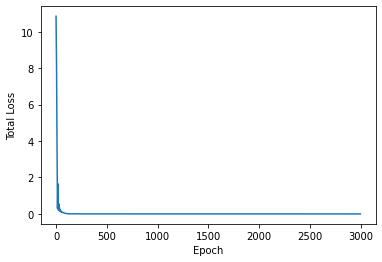

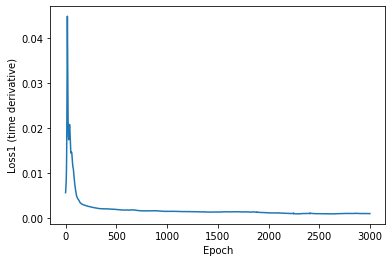

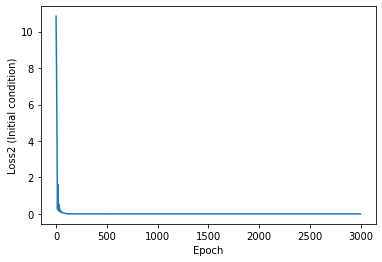

In [9]:
x_data_plot=[]
y_data_all_plot=[]
y_data_1_plot=[]
y_data_2_plot=[]

# Set fixed random number seed
torch.manual_seed(42)

start_epoch = 0
#epochs_pt = 800
epochs = 3000
ic_weight = 1
dt_weight = 10000
#pretraining = True

#if pretraining == True:
#    print('te')
#    for epoch in range(start_epoch, epochs_pt):
#        for i, data in enumerate(train_loader,0):
#            x_batch, y_batch, temp = data
#            x0 = x_batch[:,0,:]
#            optimizer.zero_grad()
#            u0 = model(x0.to(device))
#            ic_loss = criterion(u0.to(device),temp[:,0, :].to(device))
#            ic_loss.backward()
#            optimizer.step()
#        #print("Epoch ", epoch, "IC Loss ", total_loss/(i+1))
#        print("IC Loss {} Epoch {} from {}".format(ic_loss, epoch+1, epochs_pt))
#        #if not self.rank and not (epoch + 1) % writing_cycle_pt and checkpoint_path is not None:
#        #    self.write_checkpoint(checkpoint_path, epoch, True, minimum_pinn_loss, optim)
#        #if not self.rank:
#        #    print("IC Loss {} Epoch {} from {}".format(ic_loss, epoch+1, epochs_pt))


for epoch in range(epochs):
    # Print epoch
    print(f'Starting epoch {epoch}')
    
    # Set current and total loss value
    current_loss = 0.0
    total_loss = 0.0
    total_loss1 = 0.0
    total_loss2 = 0.0

    for i, data in enumerate(train_loader,0):
        
        x_batch, y_batch, temp = data
        optimizer.zero_grad()
        
        print('x_batch', x_batch.shape)
        print('y_batch', y_batch.shape)
        print('temp', temp.shape)

        x0 = x_batch[0,:]
        #x =  x_batch[1:,:]
        #x.requires_grad=True
        
        x_batch.requires_grad=True
        u_pred = model(x_batch.to(device))
        print('u pred', u_pred.shape)

        u_t = derivative(x_batch,u_pred)*normalize
        u0 = model(x0.to(device))
        print('uu tt', u_t.shape)
        print('y_batch.squeeze()',y_batch.squeeze().shape)
        print('u_t[:.:,4]', u_t[:,:,4].squeeze().shape)

        loss1 = criterion(u_t[:,:,4].squeeze().to(device),y_batch.squeeze().to(device))*dt_weight
        loss2 = criterion(u0.to(device),temp[0, :].to(device))*ic_weight

        loss = loss1+loss2

        loss.backward()
        optimizer.step()

        # Print statistics
        current_loss += loss.item()
        total_loss += loss.item()
        total_loss1 += loss1.item()
        total_loss2 += loss2.item()

        if i % 50 == 49:
            print('Loss after mini-batch %5d: %.8f' %
                  (i + 1, current_loss / 50))
            current_loss = 0.0
    #if total_loss2 < 1e-8:
    #  dt_weight = 10000
    #  ic_weight = 1
      #for g in optimizer.param_groups:
      #  g['lr'] = 1e-4
        
    print("Epoch ", epoch, "Total Loss ", total_loss/(i+1))
    print("Epoch ", epoch, "Loss 1 ", total_loss1/(i+1))
    print("Epoch ", epoch, "Loss 2", total_loss2/(i+1))

    x_data_plot.append(epoch)
    y_data_all_plot.append(total_loss/(i+1))
    y_data_1_plot.append(total_loss1/(i+1))
    y_data_2_plot.append(total_loss2/(i+1))

# Make the plot of Total Loss vs epochs
plt.plot(x_data_plot,y_data_all_plot)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.show()

# Make the plot of the supervised loss
plt.plot(x_data_plot,y_data_1_plot)
plt.xlabel('Epoch')
plt.ylabel('Loss1 (time derivative)')
plt.show()

# Make the plot of time stability loss
plt.plot(x_data_plot,y_data_2_plot)
plt.xlabel('Epoch')
plt.ylabel('Loss2 (Initial condition)')
plt.show()

In [10]:
print(u_t.shape)
print(y_batch.shape)

torch.Size([1, 2299, 5])
torch.Size([1, 2299, 1])


In [11]:
#print(temp)
#print(temp[0, :])

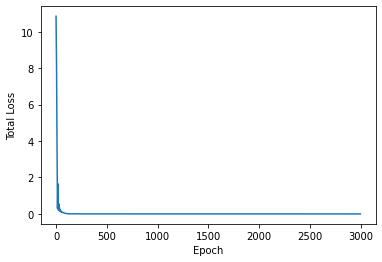

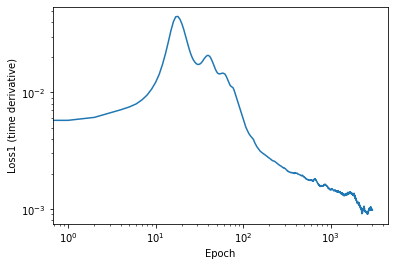

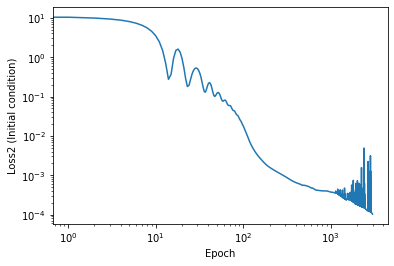

In [12]:
# Make the plot of Total Loss vs epochs
plt.plot(x_data_plot,y_data_all_plot)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.show()

# Make the plot of the supervised loss
plt.plot(x_data_plot,y_data_1_plot)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss1 (time derivative)')
plt.show()

# Make the plot of time stability loss
plt.plot(x_data_plot,y_data_2_plot)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss2 (Initial condition)')
plt.show()

In [13]:
#u0

In [14]:
#temp[0]

In [15]:
#u_t

In [16]:
#y_batch[:,1:,:]

In [17]:
#y_batch.shape

In [18]:
#ds.temp[0]

In [19]:
#torch.save(model.state_dict(),  '/content/drive/MyDrive/NeuralSolvers-heat-eqn/examples/Research project/pinnmodel_' + str(normalize) + str(batch_size)+'.pt')

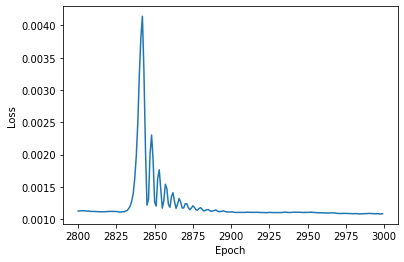

In [20]:
# Plot of last 100 epochs
plt.plot(x_data_plot[-200:],y_data_all_plot[-200:])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot of last 100 epochs
#plt.plot(x_data_plot[-200:],y_data_1_plot[-200:])
#plt.xlabel('Epoch')
#plt.ylabel('Loss 1')
#plt.show()

# Plot of last 100 epochs
#plt.plot(x_data_plot[-200:],y_data_2_plot[-200:])
#plt.xlabel('Epoch')
#plt.ylabel('Loss 2')
#plt.show()

In [21]:
# Make a prediction
#normalize = 1
print(ds.x.shape)
pred = model(ds.x.float().to(device)) #GPU
pred = pred.detach().cpu().numpy()/normalize

# ground-truth
df_y_tensor_np = ds.temp.numpy()/normalize

print(pred)
print(df_y_tensor_np)

torch.Size([2299, 5])
[[-3.5451343]
 [-3.5259643]
 [-3.5123625]
 ...
 [-3.0724776]
 [-3.0739374]
 [-3.073216 ]]
[[-3.469622 ]
 [-3.4695387]
 [-3.4692054]
 ...
 [-3.062637 ]
 [-3.0614705]
 [-3.0600133]]


In [22]:
# Some statistics on the model performance on all of dataset
mae = np.sum(np.abs(pred- df_y_tensor_np).mean(axis=None))
print('MAE:', mae)

mse = ((df_y_tensor_np - pred)**2).mean(axis=None)
print('MSE:', mse)

rel_error = np.linalg.norm(pred - df_y_tensor_np) / np.linalg.norm(df_y_tensor_np)
print('Relative error (%):', rel_error*100)


MAE: 0.007722311
MSE: 0.00010258865
Relative error (%): 0.3042167751118541


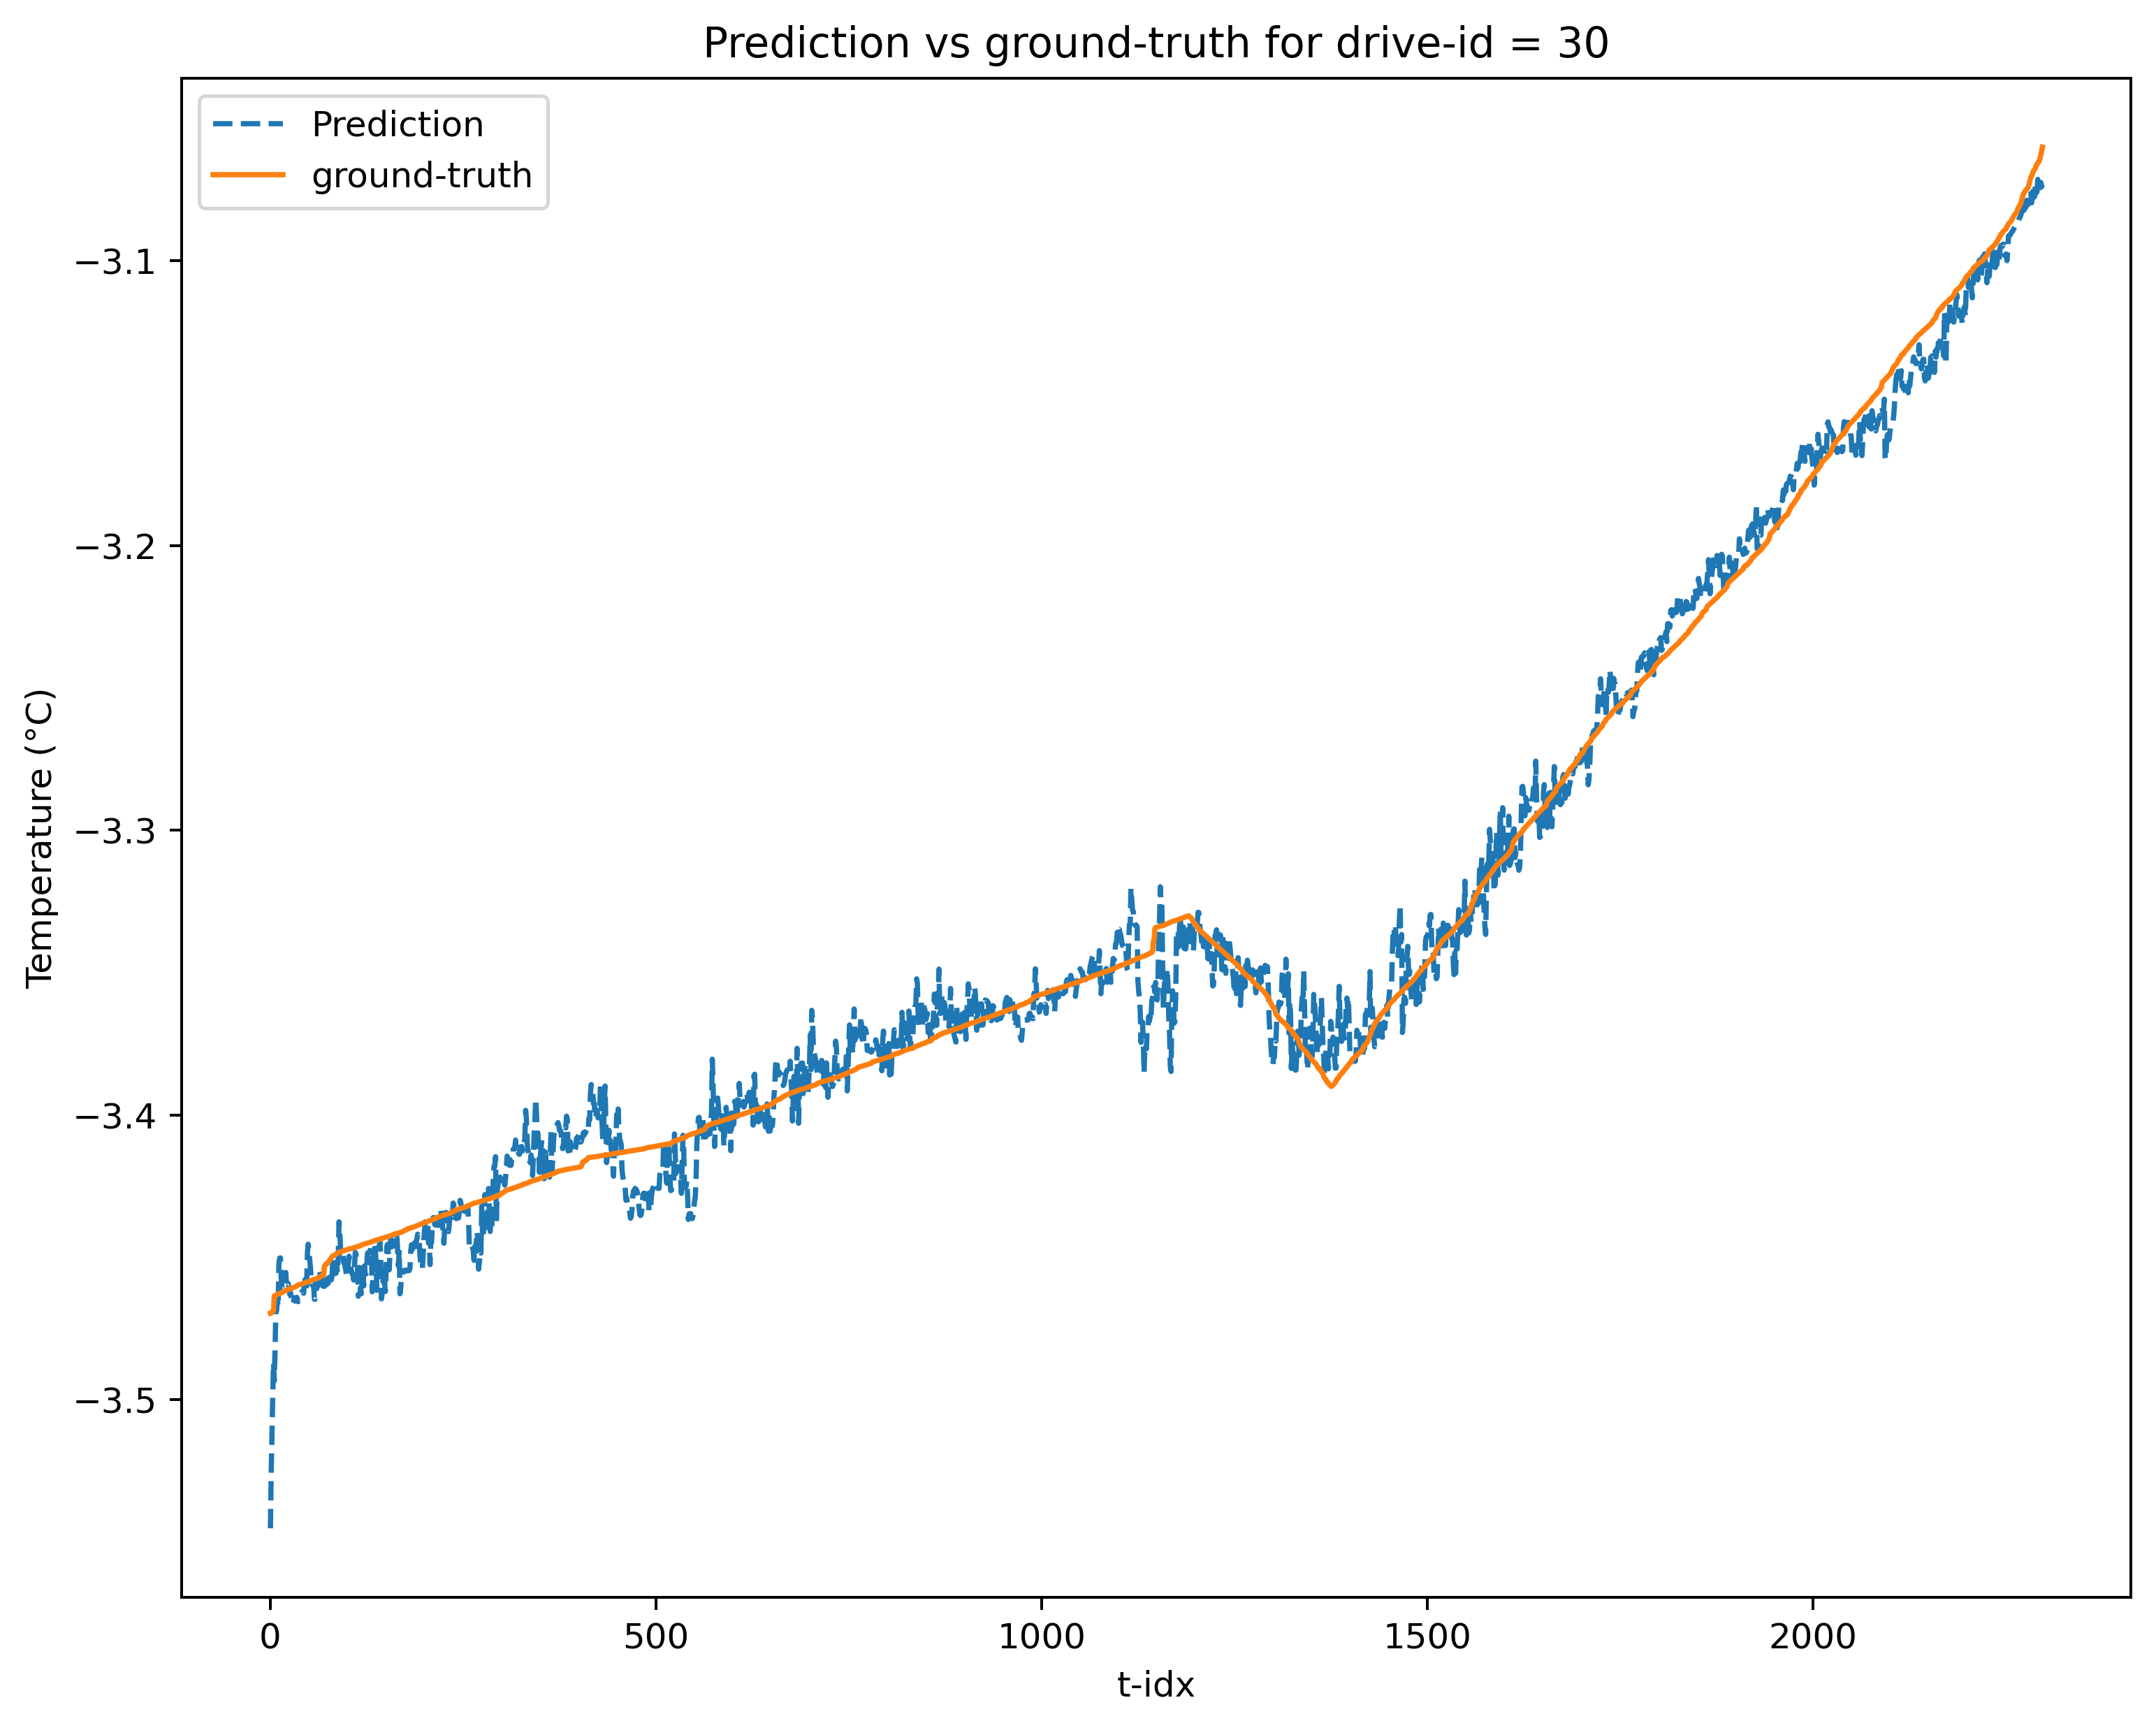

In [23]:
figure(figsize=(10, 8), dpi= 360)

plt.plot(pred, '--')
plt.plot(df_y_tensor_np, '-')
plt.title('Prediction vs ground-truth for drive-id = {}'.format(id))
plt.legend(['Prediction', 'ground-truth'])
plt.xlabel('t-idx')
plt.ylabel('Temperature (°C)')
plt.show()



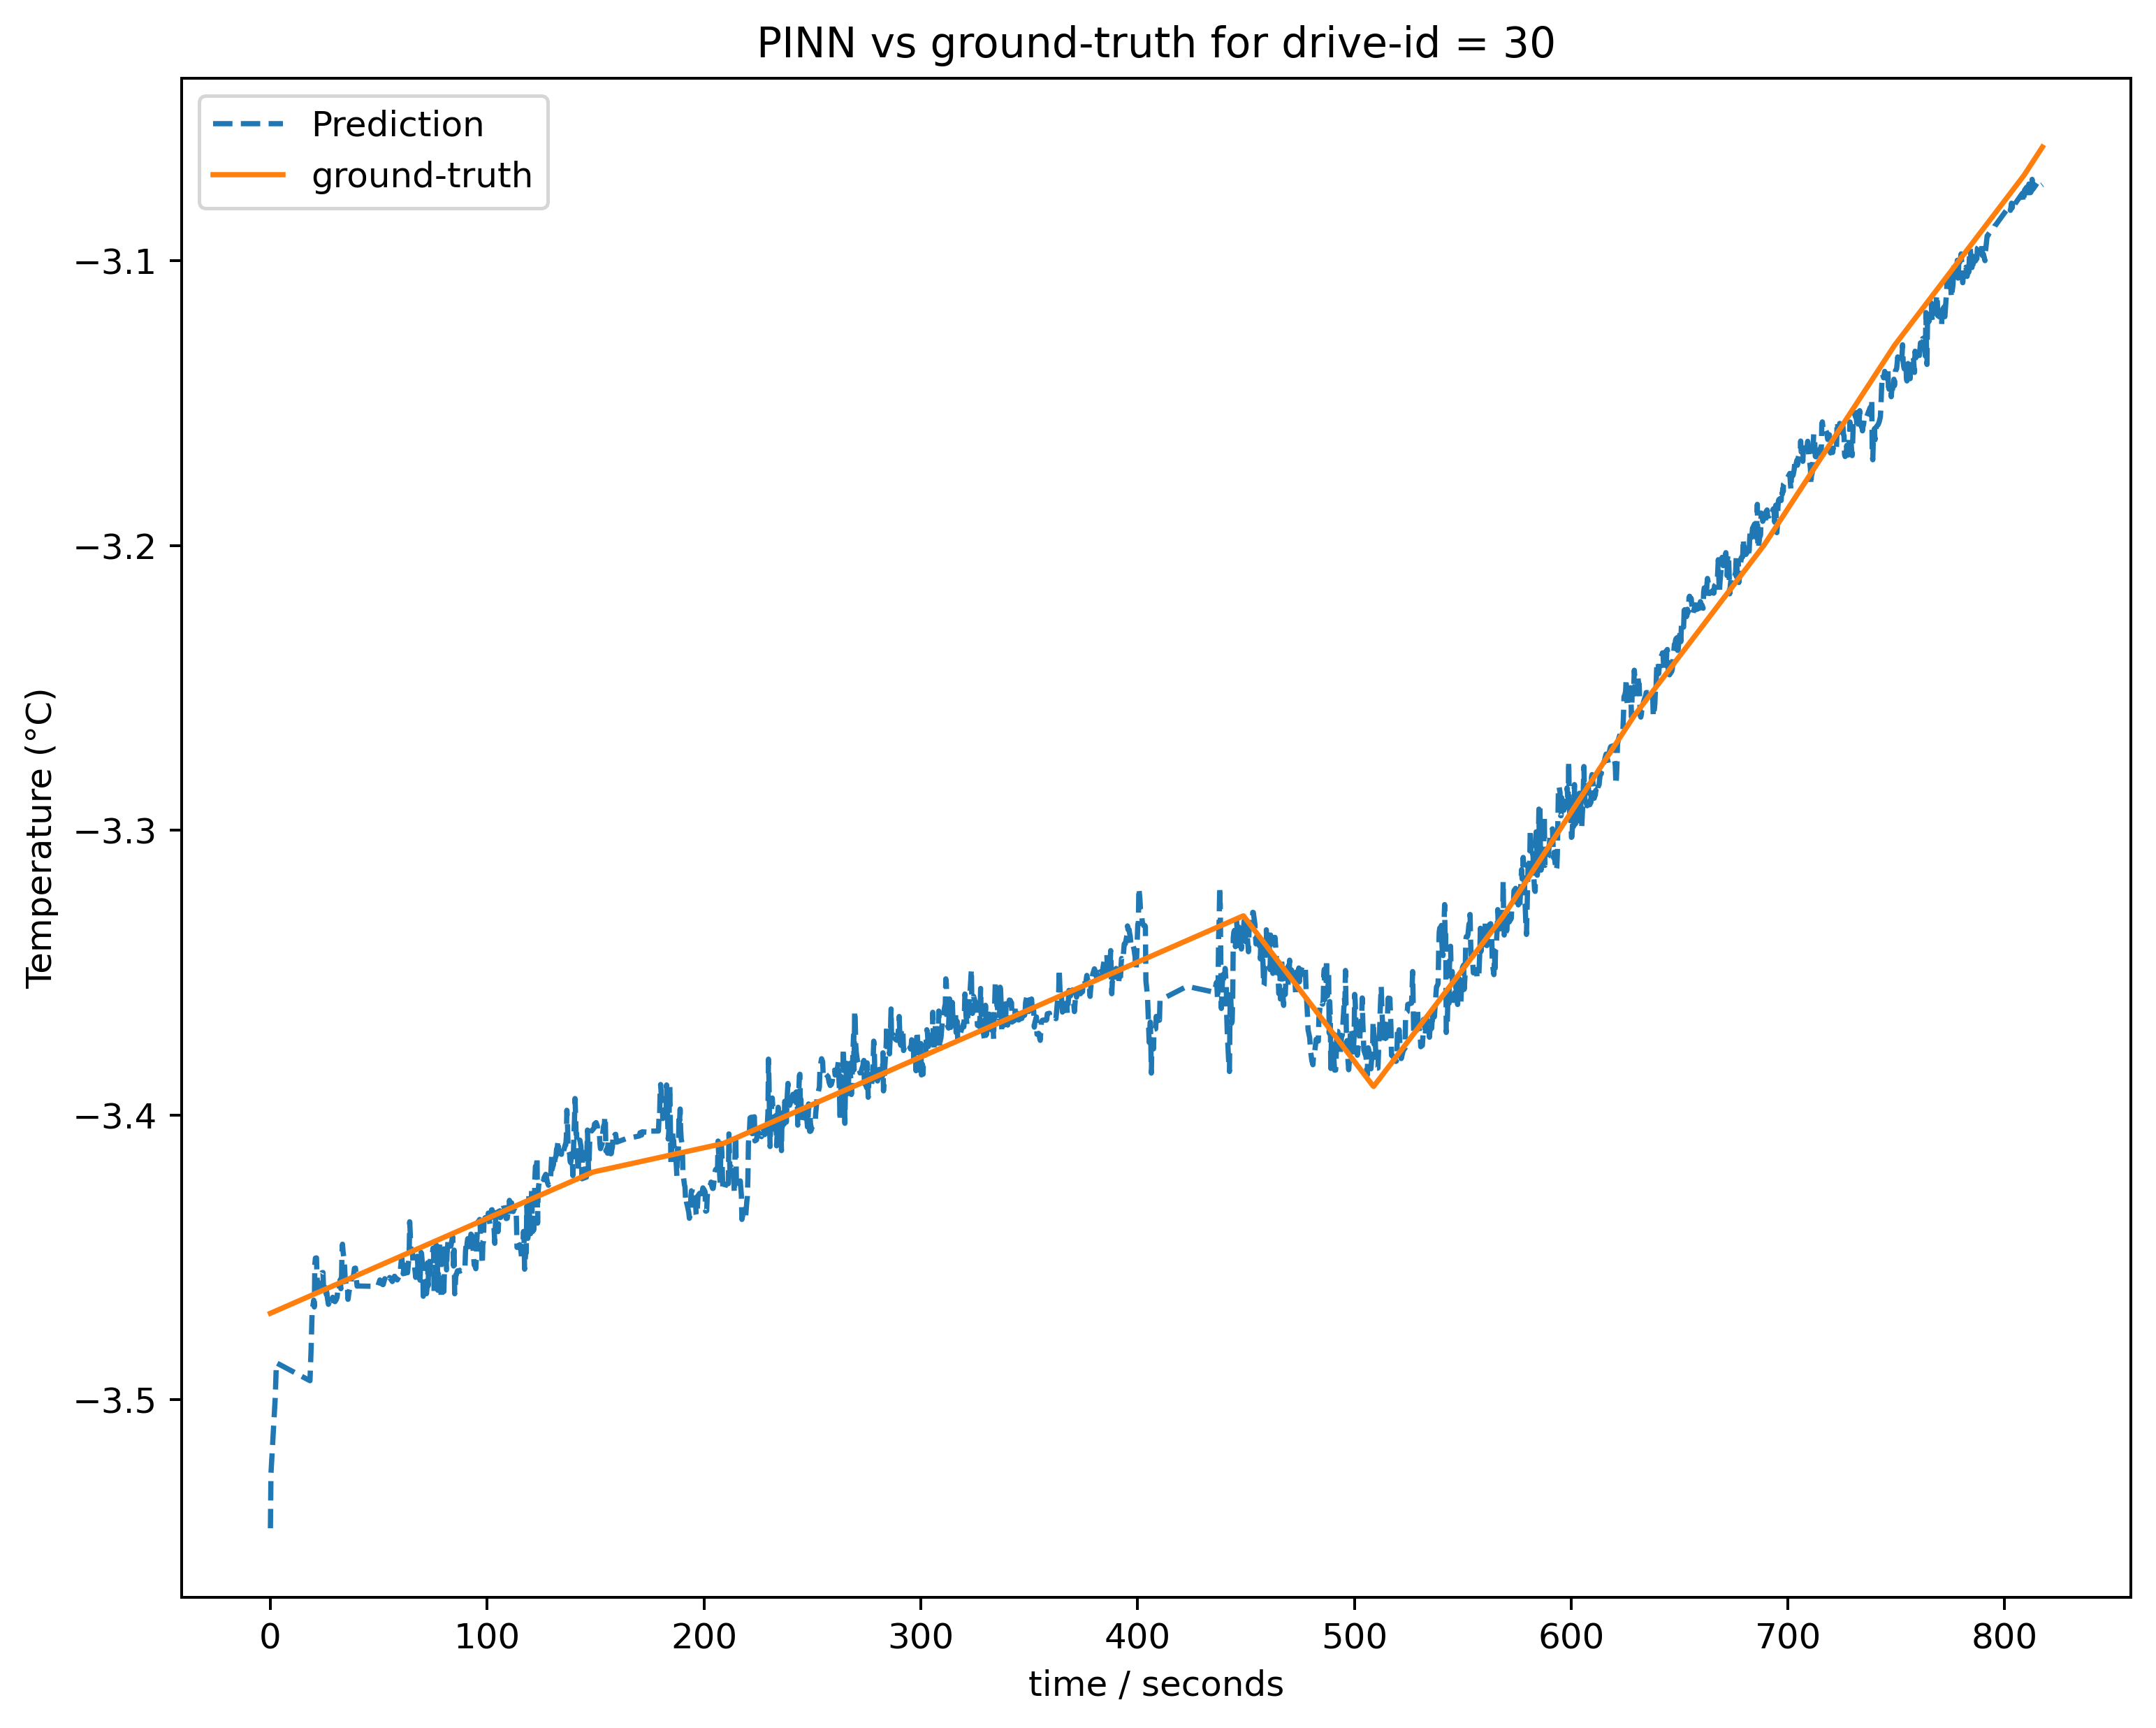

In [24]:
figure(figsize=(10, 8), dpi= 360)

#time
t=ds.t

plt.plot(t,pred, '--')
plt.plot(t,df_y_tensor_np, '-')
plt.title('PINN vs ground-truth for drive-id = {}'.format(id))
plt.legend(['Prediction', 'ground-truth'])
plt.xlabel('time / seconds')
plt.ylabel('Temperature (°C)')
plt.show()

In [25]:
print(u_t.shape)
print(y_batch.shape)

torch.Size([1, 2299, 5])
torch.Size([1, 2299, 1])


In [26]:
#u_t

In [27]:
ds.x

tensor([[ 8.0000e+00,  2.0000e+00,  5.4000e+01, -4.2500e+00,  0.0000e+00],
        [ 7.0000e+00,  2.0000e+00,  5.4000e+01, -4.0000e+00,  2.5000e-01],
        [ 7.0000e+00,  2.0000e+00,  5.4000e+01, -3.7500e+00,  1.2500e+00],
        ...,
        [ 1.0000e+00,  2.0000e+00,  5.1000e+01, -1.0000e+00,  8.1518e+02],
        [ 1.0000e+00,  0.0000e+00,  5.1000e+01, -1.0000e+00,  8.1618e+02],
        [ 1.0000e+00,  0.0000e+00,  5.1000e+01, -1.0000e+00,  8.1743e+02]])

ds.x torch.Size([2299, 5])
pred torch.Size([2299, 1])
grad u torch.Size([2299, 5])
grad u tensor([[-4.5801e-03, -2.0266e-03, -2.9517e-01,  6.1705e-02,  3.9598e-04],
        [-3.9205e-04, -5.0131e-04, -2.8881e-01,  5.9326e-02,  2.0502e-04],
        [ 4.6826e-03,  4.1369e-03, -2.2131e-01,  5.3321e-02,  1.7505e-04],
        ...,
        [ 3.9278e-03,  1.1247e-03,  4.6261e-01,  3.4604e-02,  1.0954e-03],
        [ 4.0645e-03,  1.3909e-03,  4.5767e-01,  3.3844e-02,  1.0563e-03],
        [ 1.8767e-02,  3.9167e-03,  2.6062e-01,  1.9906e-02,  4.6512e-04]],
       grad_fn=<CopyBackwards>)
torch.Size([2299, 1])
MAE: 0.0001955052
MSE: 9.7940564e-08
Relative error (%): 40.57646095752716


<Figure size 3600x2880 with 0 Axes>

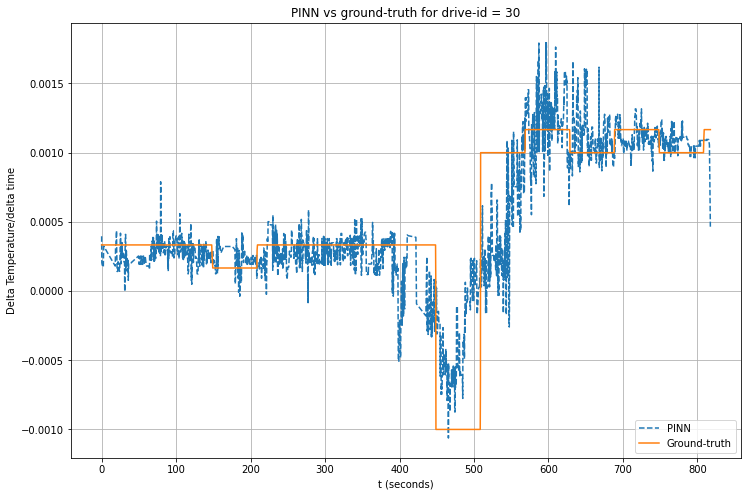

In [28]:
normalize=1
ds.x.requires_grad=True
pred = model(ds.x.float().to(device))/normalize
#pred = pred.detach().cpu().numpy()/normalize

print('ds.x', ds.x.shape)
print('pred', pred.shape)
# ground-truth
df_y_tensor_np = ds.temp.numpy()/normalize

u_t = derivative(ds.x,pred)
u_t=u_t[:,4]

figure(figsize=(10, 8), dpi= 360)

t = ds.t.numpy()

u_t = u_t.reshape(-1,1)
#y_batch = y_batch.reshape(-1,1)

print(u_t.shape)
mae = np.sum(np.abs(u_t.detach().numpy() - ds.y.detach().numpy() ).mean(axis=None))
print('MAE:', mae)

mse = ((u_t.detach().numpy() - ds.y.detach().numpy())**2).mean(axis=None)
print('MSE:', mse)

rel_error = np.linalg.norm(u_t.detach().numpy() - ds.y.detach().numpy()) / np.linalg.norm(ds.y.detach().numpy())
print('Relative error (%):', rel_error*100)

plt.figure(figsize = (12, 8))
plt.plot(t, u_t.detach().numpy(), '--', label='PINN')
plt.plot(t, ds.y, '-', label='Ground-truth')
plt.title('PINN vs ground-truth for drive-id = {}'.format(id))
plt.xlabel('t (seconds)')
plt.ylabel('Delta Temperature/delta time')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [29]:
#y_batch[1:,:]

In [30]:
# Import a slice of the datase (based on drive-id) for further analysis
#id = 0
dss = TeslaDatasetpinn(device = device, ID = id)

(2301, 10)


(2299, 1)
(2299, 1)
MAE: 0.007722311
MSE: 0.00010258865
Relative error (%): 0.3042167751118541


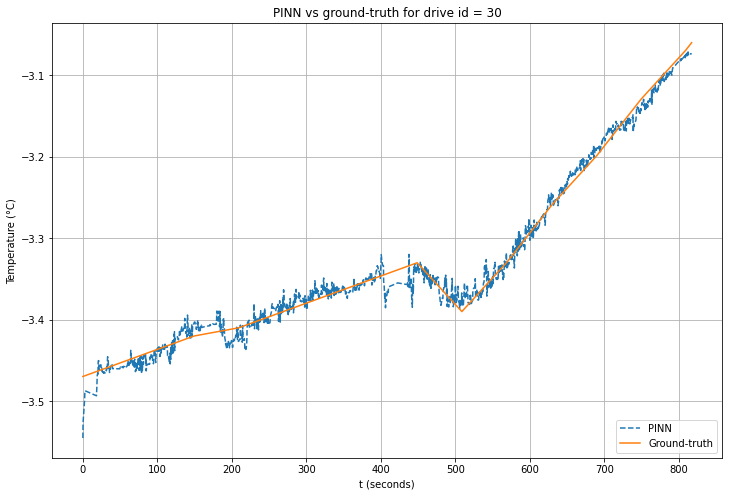

In [31]:
# Plot of predicted temperature against ground-truth temperature
t = dss.t.numpy()

true_temp = dss.temp.numpy()

pred_temp = model(dss.x.to(device))
pred_temp = pred_temp.detach().cpu().numpy()

print((pred_temp.shape))
print((true_temp.shape))

#MAE
mae = np.sum(np.abs(pred_temp- true_temp).mean(axis=None))
print('MAE:', mae)

#MSE
mse = ((true_temp - pred_temp)**2).mean(axis=None)
print('MSE:', mse)

#Relative error
rel_error = np.linalg.norm(pred_temp - true_temp) / np.linalg.norm(true_temp)
print('Relative error (%):', rel_error*100)


plt.figure(figsize = (12, 8))
plt.plot(t, pred_temp, '--', label='PINN')
plt.plot(t, true_temp, '-', label='Ground-truth')
plt.title('PINN vs ground-truth for drive id = {}'.format(id))
plt.xlabel('t (seconds)')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [32]:

#model.load_state_dict(torch.load( '/content/drive/MyDrive/NeuralSolvers-heat-eqn/examples/Research project/pinnmodel_' + str(normalize) + str(batch_size)+'.pt',map_location=torch.device('cpu')))